# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [61]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.1.3
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [64]:
# Try loading one file

df = pd.read_parquet('C:\\Users\\admin\\Documents\\Datasets and Dictionary\\trip_records\\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [65]:
df.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1         2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2         2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3         1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4         2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
5         2  2023-01-01 00:50:34   2023-01-01 01:02:52              1.0   
6         2  2023-01-01 00:09:22   2023-01-01 00:19:49              1.0   
7         2  2023-01-01 00:27:12   2023-01-01 00:49:56              1.0   
8         2  2023-01-01 00:21:44   2023-01-01 00:36:40              1.0   
9         2  2023-01-01 00:39:42   2023-01-01 00:50:36              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.97         1.0                  N           161           141   
1           1.10         1.0                  N            43           237   
2           2.51         1.0                  N            48           238   
3           1.90         1.0                  N           138             7   
4           1.43         1.0                  N           107            79   
5           1.84         1.0                  N           161           137   
6           1.66         1.0                  N           239           143   
7          11.70         1.0                  N           142           200   
8           2.95         1.0                  N           164           236   
9           3.01         1.0                  N           141           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2          9.3   1.00      0.5        0.00           0.0   
1             1          7.9   1.00      0.5        4.00           0.0   
2             1         14.9   1.00      0.5       15.00           0.0   
3             1         12.1   7.25      0.5        0.00           0.0   
4             1         11.4   1.00      0.5        3.28           0.0   
5             1         12.8   1.00      0.5       10.00           0.0   
6             1         12.1   1.00      0.5        3.42           0.0   
7             1         45.7   1.00      0.5       10.74           3.0   
8             1         17.7   1.00      0.5        5.68           0.0   
9             2         14.9   1.00      0.5        0.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         14.30                   2.5         0.00  
1                    1.0         16.90                   2.5         0.00  
2                    1.0         34.90                   2.5         0.00  
3                    1.0         20.85                   0.0         1.25  
4                    1.0         19.68                   2.5         0.00  
5                    1.0         27.80                   2.5         0.00  
6                    1.0         20.52                   2.5         0.00  
7                    1.0         64.44                   2.5         0.00  
8                    1.0         28.38                   2.5         0.00  
9                    1.0         19.90                   2.5         0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

In [66]:
#One way is to take a small percentage of entries for pickup in every hour of a date.
#So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those.
#Use tpep_pickup_datetime for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours
#Using Single Parquet at a time

#sampled_data = pd.DataFrame()  # Initialize an empty DataFrame

# Assuming 'df' is your DataFrame loaded from the parquet file.
# You'll need to loop through all the parquet files in reality.

#df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
#df['Date'] = df['tpep_pickup_datetime'].dt.date
#df['Hour'] = df['tpep_pickup_datetime'].dt.hour

#for date in df['Date'].unique():
  #for hour in range(24):
    #hour_data = df[(df['Date'] == date) & (df['Hour'] == hour)]
    #if not hour_data.empty:
      #sample = hour_data.sample(frac=0.05, random_state=42)
      #sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

# Now 'sampled_data' contains the 5% sample for each hour of each date.
#print(sampled_data.head())


---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [67]:
# Sample the data
# # It is recommmended to not load all the files at once to avoid memory overload

import pandas as pd
import os

# Directory containing the parquet files
parquet_dir = 'C:\\Users\\admin\\Documents\\Datasets and Dictionary\\trip_records\\'

# List all parquet files in the directory
parquet_files = [f for f in os.listdir(parquet_dir) if f.endswith('.parquet')]

# Initialize an empty DataFrame to store all sampled data
all_sampled_data = pd.DataFrame()

# Iterate through each parquet file
for file in parquet_files:
    file_path = os.path.join(parquet_dir, file)
    print(f"Processing file: {file_path}")

    # Load the current parquet file
    df = pd.read_parquet(file_path)

    # Ensure tpep_pickup_datetime is datetime type
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract Date and Hour
    df['Date'] = df['tpep_pickup_datetime'].dt.date
    df['Hour'] = df['tpep_pickup_datetime'].dt.hour

    # Initialize an empty DataFrame to store sampled data for the current file
    file_sampled_data = pd.DataFrame()

    # Sample data for each unique date and hour
    for date in df['Date'].unique():
        for hour in range(24):
            hour_data = df[(df['Date'] == date) & (df['Hour'] == hour)]
            if not hour_data.empty:
                # Sample 5% of the data for this hour and date
                sample = hour_data.sample(frac=0.05, random_state=42)
                file_sampled_data = pd.concat([file_sampled_data, sample], ignore_index=True)

    # Append the sampled data from the current file to the overall DataFrame
    all_sampled_data = pd.concat([all_sampled_data, file_sampled_data], ignore_index=True)

# Assign final merged result
merged_df = all_sampled_data    
    
# Now 'all_sampled_data' contains the 5% sample from each hour of each date across all files.
print("\nSampled Data Info:")
merged_df.info()

print("\nSampled Data Head:")
print(merged_df.head())

Processing file: C:\Users\admin\Documents\Datasets and Dictionary\trip_records\2023-1.parquet
Processing file: C:\Users\admin\Documents\Datasets and Dictionary\trip_records\2023-10.parquet
Processing file: C:\Users\admin\Documents\Datasets and Dictionary\trip_records\2023-11.parquet
Processing file: C:\Users\admin\Documents\Datasets and Dictionary\trip_records\2023-12.parquet
Processing file: C:\Users\admin\Documents\Datasets and Dictionary\trip_records\2023-2.parquet
Processing file: C:\Users\admin\Documents\Datasets and Dictionary\trip_records\2023-3.parquet
Processing file: C:\Users\admin\Documents\Datasets and Dictionary\trip_records\2023-4.parquet
Processing file: C:\Users\admin\Documents\Datasets and Dictionary\trip_records\2023-5.parquet
Processing file: C:\Users\admin\Documents\Datasets and Dictionary\trip_records\2023-6.parquet
Processing file: C:\Users\admin\Documents\Datasets and Dictionary\trip_records\2023-7.parquet
Processing file: C:\Users\admin\Documents\Datasets and Di

In [68]:
# from google.colab import drive
# drive.mount('/content/drive')

In [69]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
#import os

# Select the folder having data files
#os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
#file_list = os.listdir()

# initialise an empty dataframe
#df = pd.DataFrame()


# iterate through the list of files and sample one by one:
#for file_name in file_list:
    #try:
        # file path for the current file
        #file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        #sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        #df = # we initialised this empty DF earlier

    #except Exception as e:
        #print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [70]:
# Store the df in csv/parquet
merged_df.to_csv('C:\\Users\\admin\\Downloads\\Parquet.csv')

In [71]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [145]:
# Load the new data file

df = pd.read_csv('C:\\Users\\admin\\Downloads\\Parquet.csv')


In [146]:
 df.head()

Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0           0         2  2023-01-01 00:07:18   2023-01-01 00:23:15   
1           1         2  2023-01-01 00:16:41   2023-01-01 00:21:46   
2           2         2  2023-01-01 00:14:03   2023-01-01 00:24:36   
3           3         2  2023-01-01 00:24:30   2023-01-01 00:29:55   
4           4         2  2023-01-01 00:43:00   2023-01-01 01:01:00   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           7.74         1.0                  N   
1              2.0           1.24         1.0                  N   
2              3.0           1.44         1.0                  N   
3              1.0           0.54         1.0                  N   
4              NaN          19.24         NaN                NaN   

   PULocationID  DOLocationID  ...  mta_tax  tip_amount  tolls_amount  \
0           138           256  ...      0.5        0.00           0.0   
1           161           237  ...      0.5        2.58           0.0   
2           237           141  ...      0.5        0.00           0.0   
3           143           142  ...      0.5        0.00           0.0   
4            66           107  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         Date  Hour  Airport_fee  
0  2023-01-01     0          NaN  
1  2023-01-01     0          NaN  
2  2023-01-01     0          NaN  
3  2023-01-01     0          NaN  
4  2023-01-01     0          NaN  

[5 rows x 23 columns]

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  Date                   object 
 21  Hour                   int64  
 22  Airport_fee       

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [148]:
# Fix the index and drop any columns that are not needed

df = df.drop('Unnamed: 0', axis=1)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [149]:
# Combine 'Airport_fee' and 'airport_fee' columns
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
df.drop(columns='Airport_fee', inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [150]:
# Check for negative values in 'Fare_amount'
negative_fare_indices = df[df['fare_amount'] < 0].index
print(f"Indices where 'Fare_amount' is negative:\n{negative_fare_indices}")

Indices where 'Fare_amount' is negative:
Index([], dtype='int64')


Did you notice something different in the `RatecodeID` column for above records?

In [151]:
# Analyse RatecodeID for the negative fare amounts
negative_fare_ratecodes = df.loc[negative_fare_indices, 'RatecodeID'].value_counts()
print(f"\nRatecodeID distribution for negative fare amounts:\n{negative_fare_ratecodes}")



RatecodeID distribution for negative fare amounts:
Series([], Name: count, dtype: int64)


In [152]:
# Find which columns have negative values

negative_value_columns = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        if (df[col] < 0).any():
            negative_value_columns.append(col)

print(f"Columns with negative values:\n{negative_value_columns}")

Columns with negative values:
['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [153]:
# fix these negative values

for col in ['extra', 'mta_tax', 'improvement_surcharge','total_amount','congestion_surcharge', 'airport_fee']:
    if col in df.columns:
        df[col] = df[col].abs()

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [154]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().sum() / len(df)
missing_proportion

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
store_and_fwd_flag       0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
airport_fee              0.034209
Date                     0.000000
Hour                     0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [155]:
# Display the rows with null values
print(df[df['passenger_count'].isnull()])

# Impute NaN values in 'passenger_count'
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896343         1  2023-09-30 23:18:31   2023-09-30 23:30:35              NaN   
1896356         1  2023-09-30 23:42:07   2023-10-01 00:05:22              NaN   
1896369         1  2023-09-30 23:59:39   2023-10-01 00:15:03              NaN   
1896376         1  2023-09-30 23:47:09   2023-10-01 00:03:01              NaN   
1896387         1  2023-09-30 23:17:34   2023-09-30 23:30:46              NaN   

         trip_distance  Rat

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [156]:
# Display the rows with null values
print(df[df['RatecodeID'].isnull()])

# Impute NaN values in 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].median())

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   
...           ...                  ...                   ...              ...   
1896343         1  2023-09-30 23:18:31   2023-09-30 23:30:35              1.0   
1896356         1  2023-09-30 23:42:07   2023-10-01 00:05:22              1.0   
1896369         1  2023-09-30 23:59:39   2023-10-01 00:15:03              1.0   
1896376         1  2023-09-30 23:47:09   2023-10-01 00:03:01              1.0   
1896387         1  2023-09-30 23:17:34   2023-09-30 23:30:46              1.0   

         trip_distance  Rat

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [157]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].median())

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [158]:
# Handle any remaining missing values
for column in df.columns:
    if df[column].isnull().any():
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = df[column].fillna(df[column].median())
        else:
            df[column] = df[column].fillna(df[column].mode()[0])

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

           VendorID  passenger_count  trip_distance    RatecodeID  \
count  1.896400e+06     1.896400e+06   1.896400e+06  1.896400e+06   
mean   1.733026e+00     1.356585e+00   3.858293e+00  1.612981e+00   
std    4.476401e-01     8.799160e-01   1.294085e+02  7.267261e+00   
min    1.000000e+00     0.000000e+00   0.000000e+00  1.000000e+00   
25%    1.000000e+00     1.000000e+00   1.050000e+00  1.000000e+00   
50%    2.000000e+00     1.000000e+00   1.790000e+00  1.000000e+00   
75%    2.000000e+00     1.000000e+00   3.400000e+00  1.000000e+00   
max    6.000000e+00     9.000000e+00   1.263605e+05  9.900000e+01   

       PULocationID  DOLocationID  payment_type   fare_amount         extra  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.652814e+02  1.640515e+02  1.163817e+00  1.991935e+01  1.588022e+00   
std    6.400038e+01  6.980207e+01  5.081384e-01  1.055371e+02  1.829196e+00   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00 

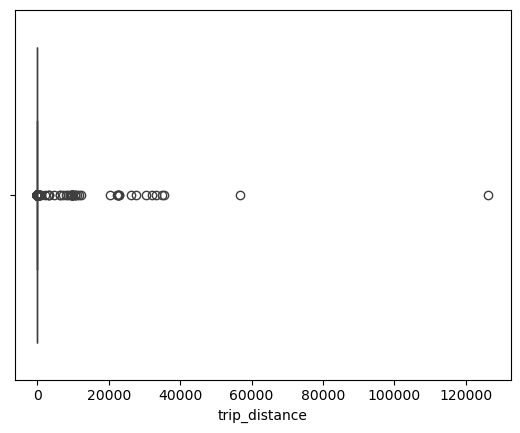

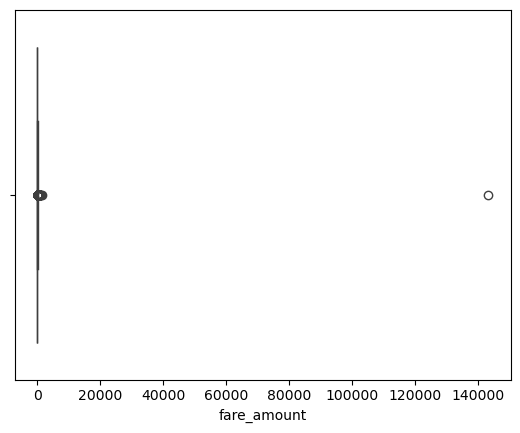

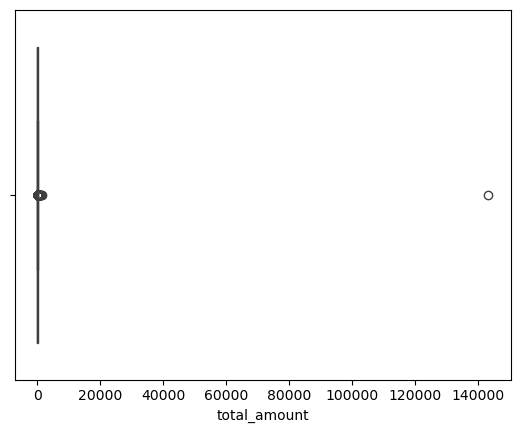

In [159]:
# Describe the data to identify potential outliers
print(df.describe())

# Check for outliers in specific columns (trip_distance, fare_amount, total_amount)
for col in ['trip_distance', 'fare_amount', 'total_amount', 'passenger_count']:
  print(f"\nOutlier analysis for {col}:")
  # Using IQR method
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"Number of outliers: {len(outliers)}")
  print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

  # Display some outlier examples:
  print(outliers[[col]].head())


# Further analysis can include visualizations (box plots, histograms)
# to better understand the distribution and identify outliers.
# Example using seaborn:

sns.boxplot(x=df['trip_distance'])
plt.show()

sns.boxplot(x=df['fare_amount'])
plt.show()

sns.boxplot(x=df['total_amount'])
plt.show()

In [160]:
# prompt: Drop the outliers in trip distance column in DataFrame

# Calculate quartiles and IQR for 'trip_distance'
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_no_outliers = df[(df['trip_distance'] >= lower_bound) & (df['trip_distance'] <= upper_bound)]

# Print some info
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")


Original DataFrame shape: (1896400, 21)
DataFrame shape after removing outliers: (1647098, 21)


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [161]:
# remove passenger_count > 6

df = df[df['passenger_count'] <= 6]


In [162]:
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
outlier_indices = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] > 300)].index
print(f"Number of outliers: {len(outlier_indices)}")
print(df.loc[outlier_indices])

# You can choose to drop these outliers or further investigate and potentially correct them
# Example of dropping the outliers
df = df.drop(outlier_indices)


Number of outliers: 35
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
38085           1  2023-01-09 16:17:32   2023-01-09 16:20:41              1.0   
46484           1  2023-01-11 12:38:54   2023-01-11 12:38:54              0.0   
90267           2  2023-01-19 20:58:47   2023-01-19 20:58:51              4.0   
199729          2  2023-10-09 21:36:01   2023-10-09 21:39:15              1.0   
215415          1  2023-10-13 18:22:04   2023-10-13 18:22:38              1.0   
258172          2  2023-10-20 01:11:27   2023-10-20 01:13:03              1.0   
472850          2  2023-11-26 16:04:06   2023-11-26 16:04:12              1.0   
532967          2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
637841          2  2023-12-24 14:01:07   2023-12-24 14:01:44              1.0   
824163          1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
867191          1  2023-06-08 04:59:03   2023-06-08 04:59:38              2.0   
87910

In [163]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
outlier_indices = df[(df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID'])].index
print(f"Number of outliers: {len(outlier_indices)}")
print(df.loc[outlier_indices])

# You can choose to drop these outliers or further investigate and potentially correct them
# Example of dropping the outliers
df = df.drop(outlier_indices)


Number of outliers: 63
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
43681           1  2023-01-10 19:28:41   2023-01-10 20:14:48              1.0   
83048           1  2023-01-18 15:42:00   2023-01-18 15:42:00              1.0   
83247           1  2023-01-18 16:23:49   2023-01-18 16:23:49              1.0   
90721           1  2023-01-19 21:57:21   2023-01-19 22:17:44              1.0   
142069          1  2023-01-29 18:33:14   2023-01-29 18:33:14              1.0   
...           ...                  ...                   ...              ...   
1718458         1  2023-07-24 14:14:22   2023-07-24 14:14:22              1.0   
1735378         1  2023-07-27 18:59:15   2023-07-27 18:59:15              2.0   
1844320         1  2023-09-17 20:40:48   2023-09-17 20:40:48              1.0   
1854559         2  2023-09-19 21:27:12   2023-09-19 21:27:48              1.0   
1887230         1  2023-09-29 11:12:42   2023-09-29 11:12:42              1.0   

    

In [164]:
# Entries where trip_distance is more than 250 miles.
outlier_indices = df[df['trip_distance'] > 250].index
print(f"Number of outliers: {len(outlier_indices)}")
print(df.loc[outlier_indices])

# You can choose to drop these outliers or further investigate and potentially correct them
# Example of dropping the outliers
df = df.drop(outlier_indices)

Number of outliers: 46
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
30438           2  2023-01-07 20:02:05   2023-01-07 20:07:10              1.0   
111442          2  2023-01-24 06:27:00   2023-01-24 07:18:00              1.0   
136826          2  2023-01-28 18:16:37   2023-01-28 18:41:22              1.0   
137589          2  2023-01-28 20:39:00   2023-01-28 20:59:00              1.0   
152189          2  2023-10-01 00:05:00   2023-10-01 00:19:00              1.0   
316935          2  2023-10-30 07:13:00   2023-10-30 07:33:00              1.0   
439631          2  2023-11-20 11:46:00   2023-11-20 12:30:00              1.0   
539719          2  2023-12-08 23:45:00   2023-12-09 00:14:00              1.0   
547189          2  2023-12-10 01:11:00   2023-12-10 01:25:00              1.0   
550654          2  2023-12-10 17:10:00   2023-12-10 17:12:00              1.0   
632702          1  2023-12-27 06:00:00   2023-12-27 07:22:13              1.0   
65183

In [165]:
# Entries where payment_type is 0
outlier_indices = df[df['payment_type'] == 0].index
print(f"Number of outliers: {len(outlier_indices)}")
print(df.loc[outlier_indices])

# You can choose to drop these outliers or further investigate and potentially correct them
# Example of dropping the outliers
df = df.drop(outlier_indices)


Number of outliers: 64844
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              1.0   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              1.0   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              1.0   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              1.0   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              1.0   
...           ...                  ...                   ...              ...   
1896343         1  2023-09-30 23:18:31   2023-09-30 23:30:35              1.0   
1896356         1  2023-09-30 23:42:07   2023-10-01 00:05:22              1.0   
1896369         1  2023-09-30 23:59:39   2023-10-01 00:15:03              1.0   
1896376         1  2023-09-30 23:47:09   2023-10-01 00:03:01              1.0   
1896387         1  2023-09-30 23:17:34   2023-09-30 23:30:46              1.0   

 

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [166]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Date',
 'Hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [167]:

variable_categories = pd.DataFrame({
    'Variable': [
        'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
        'DOLocationID', 'payment_type', 'pickup_hour', 'trip_duration',
        'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
        'improvement_surcharge', 'total_amount', 'congestion_surcharge',
        'Airport_fee'
    ],
    'Category': [
        'Categorical', 'Numerical', 'Numerical',
        'Numerical', 'Numerical', 'Categorical', 'Categorical',
        'Categorical', 'Categorical', 'Numerical','Numerical',
        'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Numerical',
        'Numerical', 'Numerical', 'Numerical', 'Numerical'
    ]
})

# Display the DataFrame
variable_categories


Variable     Category
0                VendorID  Categorical
1    tpep_pickup_datetime    Numerical
2   tpep_dropoff_datetime    Numerical
3         passenger_count    Numerical
4           trip_distance    Numerical
5              RatecodeID  Categorical
6            PULocationID  Categorical
7            DOLocationID  Categorical
8            payment_type  Categorical
9             pickup_hour    Numerical
10          trip_duration    Numerical
11            fare_amount    Numerical
12                  extra    Numerical
13                mta_tax    Numerical
14             tip_amount    Numerical
15           tolls_amount    Numerical
16  improvement_surcharge    Numerical
17           total_amount    Numerical
18   congestion_surcharge    Numerical
19            Airport_fee    Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

Hour
0      51164
1      34278
2      22551
3      14710
4       9436
5      10021
6      24468
7      48990
8      68278
9      78289
10     85629
11     93037
12    101004
13    104107
14    111576
15    114301
16    114289
17    123563
18    129190
19    115920
20    103435
21    103167
22     95160
23     74828
Name: Hour, dtype: int64


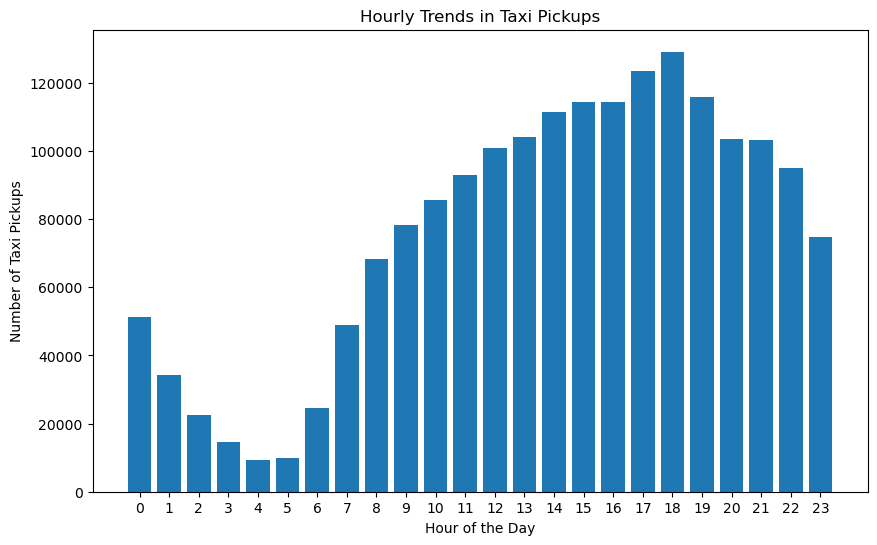

In [168]:
# Find and show the hourly trends in taxi pickups

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['Hour'] = df['tpep_pickup_datetime'].dt.hour

hourly_trends = df.groupby('Hour')['Hour'].count()

print(hourly_trends)

# You can visualize this using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(hourly_trends.index, hourly_trends.values)
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Taxi Pickups")
plt.title("Hourly Trends in Taxi Pickups")
plt.xticks(range(24)) # Ensure all 24 hours are displayed on x-axis.
plt.show()



In [169]:
# Find and show the daily trends in taxi pickups (days of the week)



DayOfWeek
0    228958
1    265938
2    281563
3    287265
4    271619
5    265857
6    230191
Name: DayOfWeek, dtype: int64


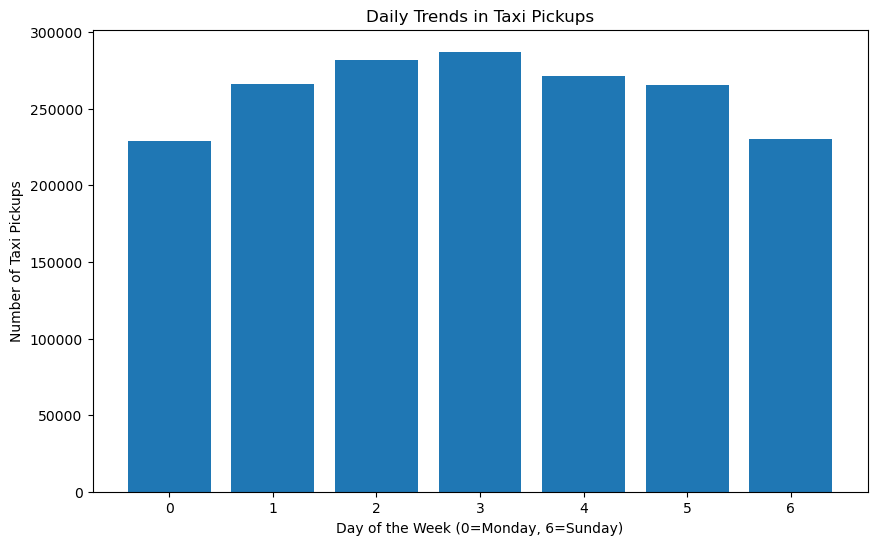

In [170]:
import matplotlib.pyplot as plt
# Find and show the daily trends in taxi pickups (days of the week)
df['DayOfWeek'] = df['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

daily_trends = df.groupby('DayOfWeek')['DayOfWeek'].count()

print(daily_trends)

# You can visualize this using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(daily_trends.index, daily_trends.values)
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Taxi Pickups")
plt.title("Daily Trends in Taxi Pickups")
plt.xticks(range(7)) # Ensure all days are displayed on the x-axis.
plt.show()


In [171]:
# Show the monthly trends in pickups



Month
1     148473
2     140711
3     164282
4     158376
5     168977
6     158986
7     139726
8     135253
9     133930
10    166522
11    158401
12    157754
Name: Month, dtype: int64


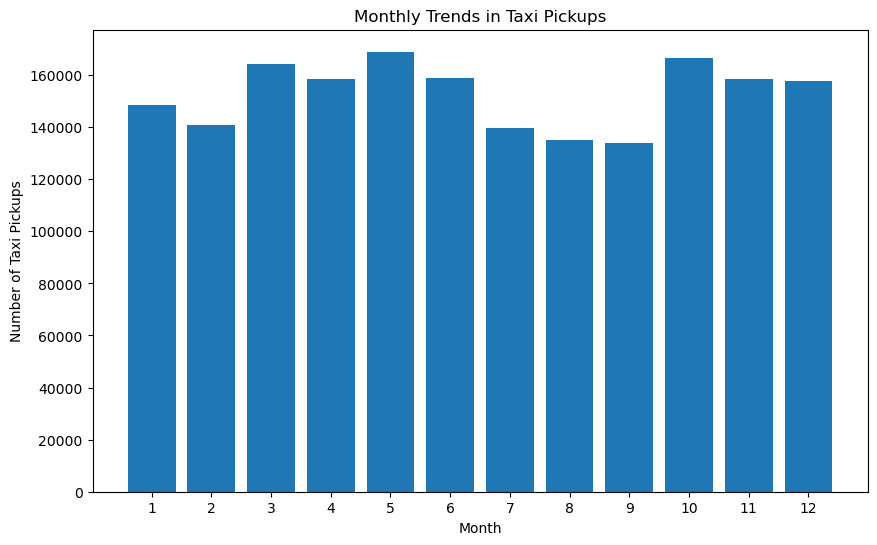

In [172]:
#Show the monthly trends in pickups

import matplotlib.pyplot as plt
# Show the monthly trends in pickups
df['Month'] = df['tpep_pickup_datetime'].dt.month

monthly_trends = df.groupby('Month')['Month'].count()

print(monthly_trends)

# You can visualize this using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(monthly_trends.index, monthly_trends.values)
plt.xlabel("Month")
plt.ylabel("Number of Taxi Pickups")
plt.title("Monthly Trends in Taxi Pickups")
plt.xticks(range(1, 13))  # Ensure all 12 months are displayed on x-axis.
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [174]:

# Check for zero/negative values in specified columns
for col in ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']:
    print(f"Analysis for '{col}':")
    print(f"Number of zero values: {(df[col] == 0).sum()}")
    print(f"Number of negative values: {(df[col] < 0).sum()}")
    print("-" * 20)


Analysis for 'fare_amount':
Number of zero values: 575
Number of negative values: 0
--------------------
Analysis for 'tip_amount':
Number of zero values: 410234
Number of negative values: 0
--------------------
Analysis for 'total_amount':
Number of zero values: 255
Number of negative values: 0
--------------------
Analysis for 'trip_distance':
Number of zero values: 22928
Number of negative values: 0
--------------------


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [175]:
# Create a copy of the DataFrame to avoid modifying the original
df_nonzero = df.copy()

# Define the columns to check for non-zero values
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Filter out rows where any of the specified columns have zero values
for col in columns_to_check:
    df_nonzero = df_nonzero[df_nonzero[col] != 0]

# Display the first few rows of the new DataFrame
print(df_nonzero.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
5         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6         2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7         2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
8         2  2023-01-01 00:44:09   2023-01-01 01:01:17              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1           1.24         1.0                  N           161           237   
5           7.10         1.0                  N           246            37   
6           1.59         1.0                  N            79           164   
7           3.16         1.0                  N            79           256   
8           7.64         1.0                  N           132            95   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
1

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Month
1     4055140.03
2     3834429.38
3     4624736.17
4     4540774.57
5     4944805.20
6     4654508.07
7     4051783.31
8     3948538.33
9     4171712.09
10    4957405.27
11    4614506.20
12    4602776.11
Name: total_amount, dtype: float64


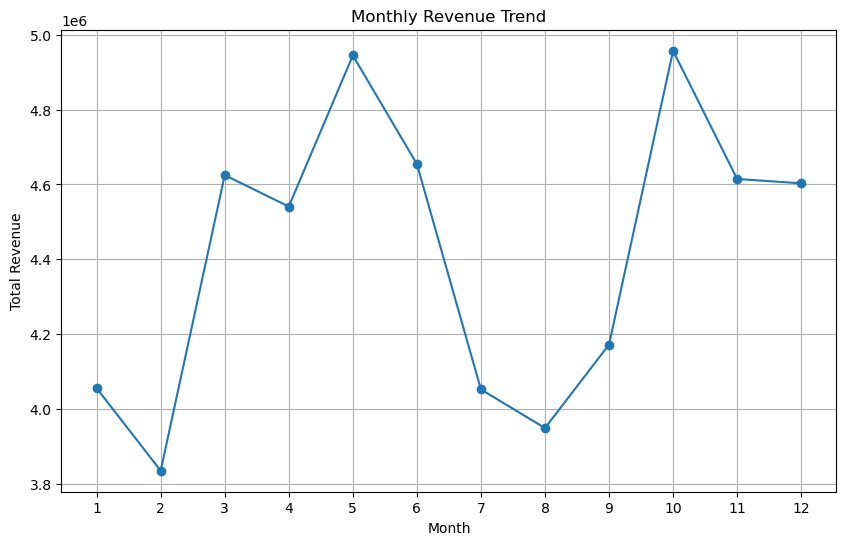

In [176]:

# Group data by month and calculate the total revenue for each month
monthly_revenue = df.groupby('Month')['total_amount'].sum()

# Print the monthly revenue
print(monthly_revenue)

# Visualize the monthly revenue trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trend")
plt.xticks(range(1, 13))  # Ensure all 12 months are displayed on the x-axis.
plt.grid(True)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarter
1    0.236114
2    0.266788
3    0.229656
4    0.267441
Name: total_amount, dtype: float64


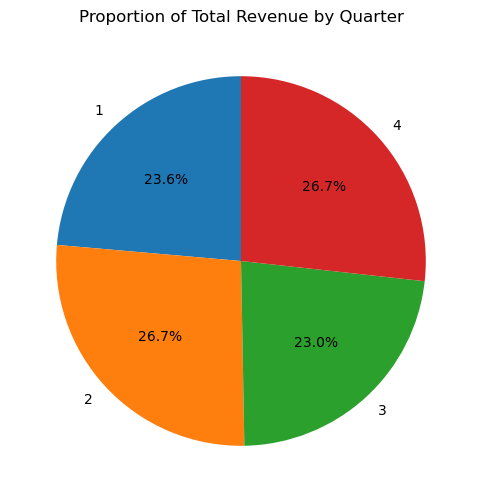

In [177]:
# Calculate total revenue for each quarter
df['Quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df.groupby('Quarter')['total_amount'].sum()

# Calculate the proportion of each quarter
quarter_proportions = quarterly_revenue / quarterly_revenue.sum()

# Print the proportions
print(quarter_proportions)

# Visualize the proportions (optional)
plt.figure(figsize=(8, 6))
plt.pie(quarter_proportions, labels=quarter_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Total Revenue by Quarter')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

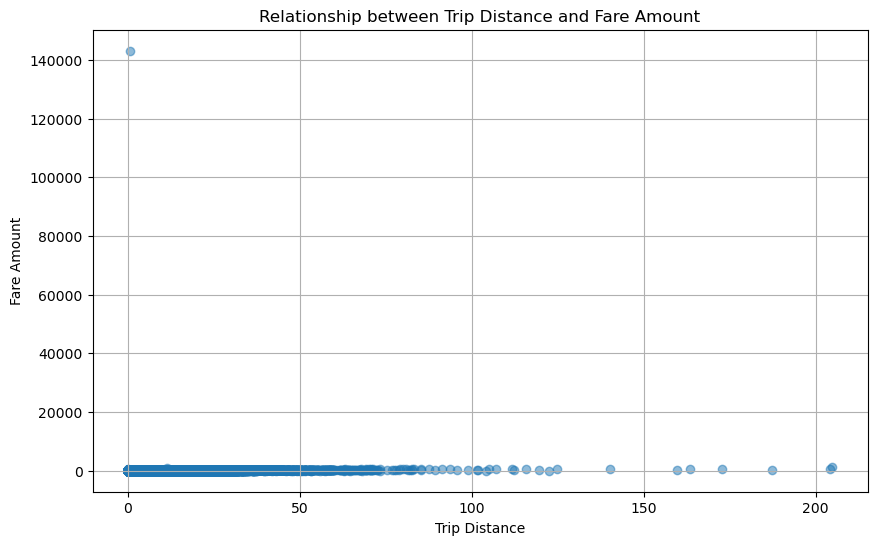

Correlation between trip distance and fare amount: 0.15624640665018402


In [178]:
# Filter out trips with trip_distance equal to 0
df_filtered = df[df['trip_distance'] != 0]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['trip_distance'], df_filtered['fare_amount'], alpha=0.5)  # alpha for transparency
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Relationship between Trip Distance and Fare Amount')
plt.grid(True)
plt.show()

# Calculate the correlation
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between trip distance and fare amount: {correlation}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

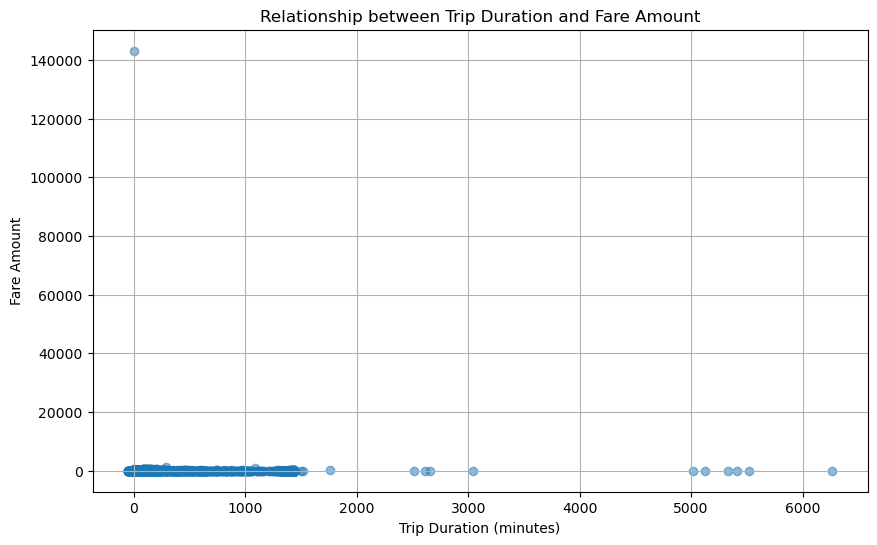

Correlation between trip duration and fare amount: 0.0447092801880008


In [179]:
# Show relationship between fare and trip duration

# Calculate trip duration
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['trip_duration'], df['fare_amount'], alpha=0.5)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount')
plt.title('Relationship between Trip Duration and Fare Amount')
plt.grid(True)
plt.show()

# Calculate the correlation
correlation = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation between trip duration and fare amount: {correlation}")

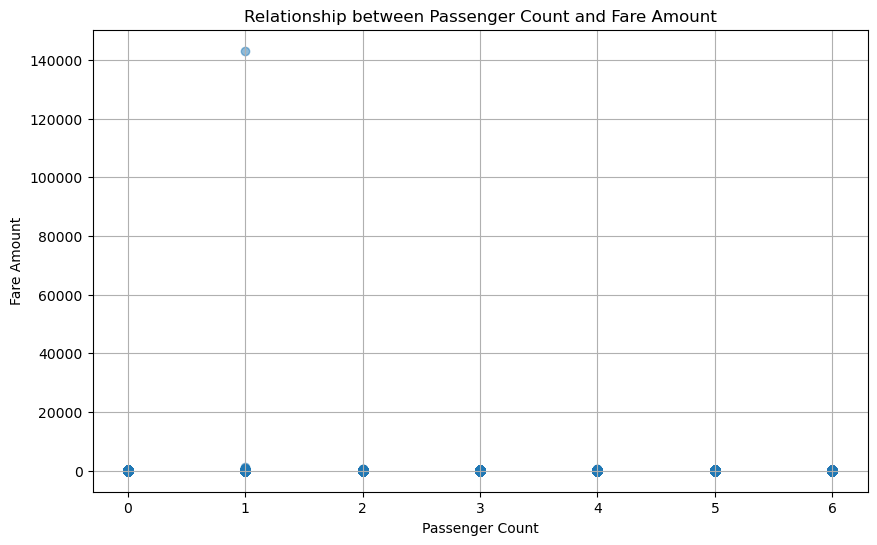

Correlation between passenger count and fare amount: 0.007537019620176113


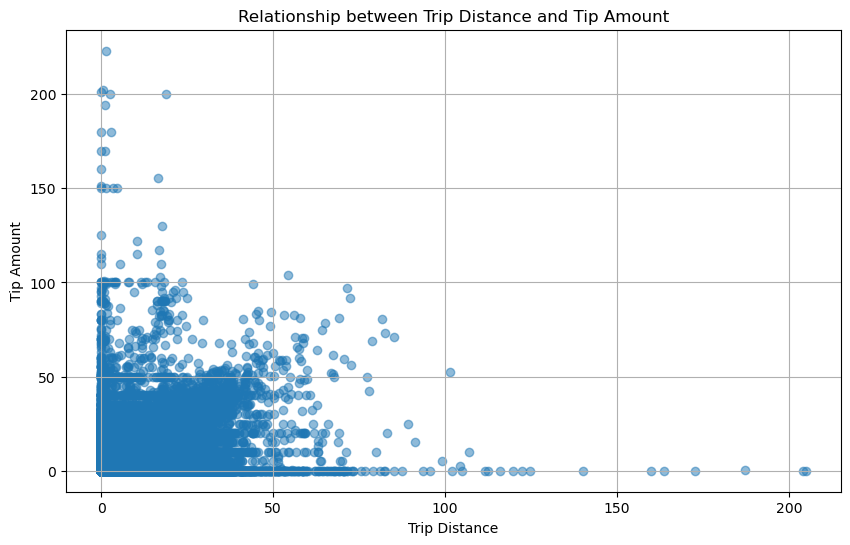

Correlation between trip distance and tip amount: 0.5721147489650038


In [180]:
# Show relationship between fare and number of passengers

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['passenger_count'], df['fare_amount'], alpha=0.5)
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.title('Relationship between Passenger Count and Fare Amount')
plt.grid(True)
plt.show()

# Calculate the correlation
correlation = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation between passenger count and fare amount: {correlation}")

# Show relationship between tip and trip distance

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['trip_distance'], df['tip_amount'], alpha=0.5)
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.title('Relationship between Trip Distance and Tip Amount')
plt.grid(True)
plt.show()

# Calculate the correlation
correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation}")


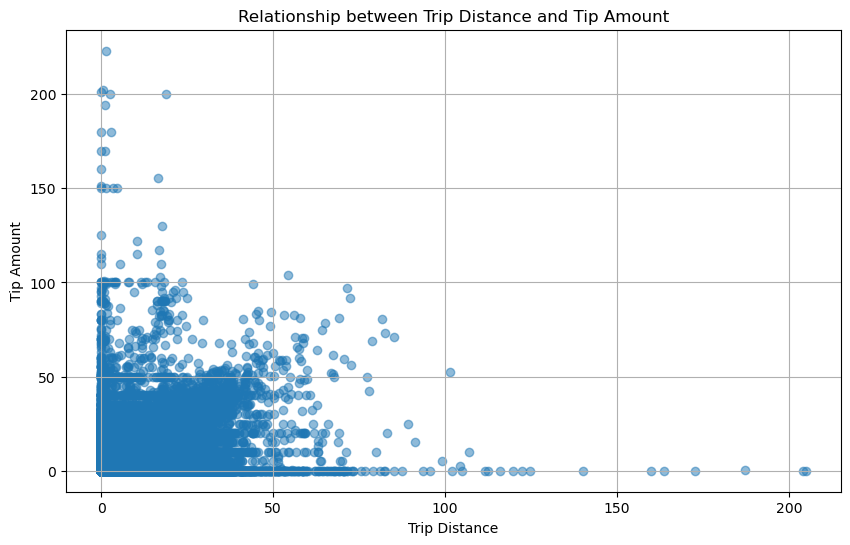

Correlation between trip distance and tip amount: 0.5721147489650038


In [181]:
# Show relationship between tip and trip distance

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['trip_distance'], df['tip_amount'], alpha=0.5)
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.title('Relationship between Trip Distance and Tip Amount')
plt.grid(True)
plt.show()

# Calculate the correlation
correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between trip distance and tip amount: {correlation}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    1492301
2     316412
4      13672
3       9006
Name: count, dtype: int64


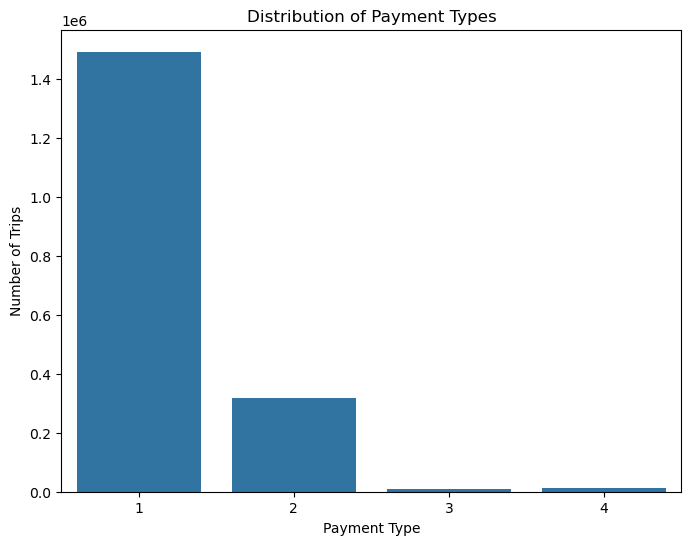

In [182]:
# Analyse the distribution of different payment types (payment_type).

payment_type_counts = df['payment_type'].value_counts()
print(payment_type_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=df)
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.title('Distribution of Payment Types')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [183]:
pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [184]:
import geopandas as gpd
# Read the shapefile using geopandas
zones =  gpd.read_file('C:\\Users\\admin\\Documents\\Datasets and Dictionary\\taxi_zones\\taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

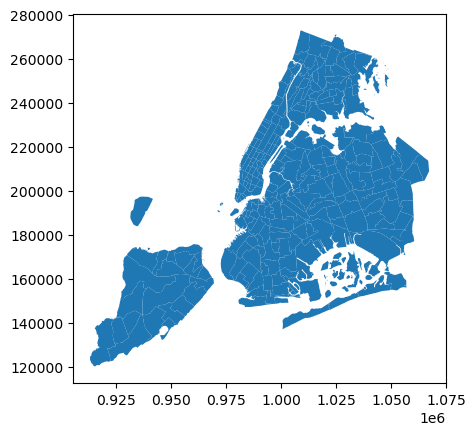

In [185]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [186]:
# Merge zones and trip records using locationID and PULocationID

print(zones.columns)


Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


In [187]:
# Merge zones and trip records using locationID and PULocationID
df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
# You can rename the columns if needed
df = df.rename(columns={
    'OBJECTID_y': 'OBJECTID_PU',
    'Shape_Leng_y': 'Shape_Leng_PU',
    'Shape_Area_y': 'Shape_Area_PU',
    'zone_y': 'PU_zone',
    'LocationID_y': 'PU_LocationID',
    'borough_y': 'PU_borough',
    'geometry_y': 'PU_geometry'
})


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

PULocationID
1        214
2          2
3         40
4       1861
5         13
       ...  
261     9608
262    23617
263    34870
264    17532
265      997
Name: PULocationID, Length: 257, dtype: int64


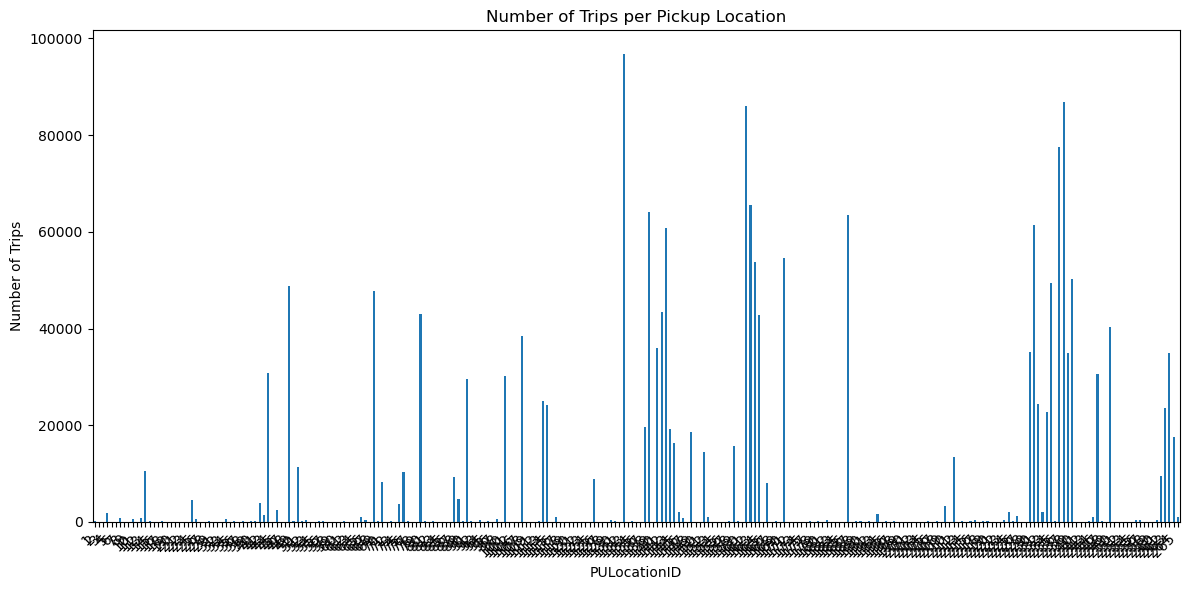

In [188]:
# Group data by location and calculate the number of trips
location_trip_counts = df.groupby('PULocationID')['PULocationID'].count()

# Print the result
print(location_trip_counts)

# You can visualize this using a bar plot (optional)
plt.figure(figsize=(12, 6))
location_trip_counts.plot(kind='bar')
plt.xlabel('PULocationID')
plt.ylabel('Number of Trips')
plt.title('Number of Trips per Pickup Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [189]:
# Merge trip counts back to the zones GeoDataFrame
zones = zones.merge(location_trip_counts.rename('trip_count'), left_on='LocationID', right_index=True)

# Display the updated GeoDataFrame
print(zones.head())


   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0         214  
1           2  
2          40  
3        1861  
4          13  


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

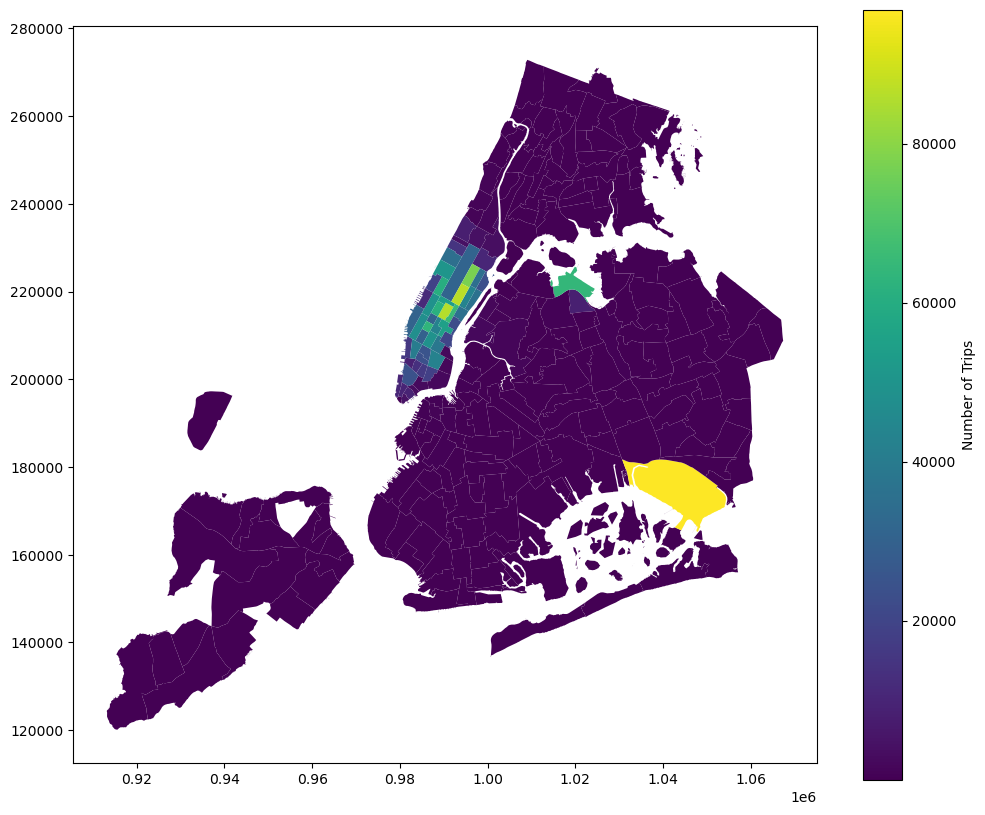

In [190]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
zones.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "vertical"})
plt.show()


In [191]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by='trip_count', ascending=False)
zones_sorted


OBJECTID  Shape_Leng  Shape_Area                                 zone  \
131       132    0.245479    0.002038                          JFK Airport   
236       237    0.042213    0.000096                Upper East Side South   
160       161    0.035804    0.000072                       Midtown Center   
235       236    0.044252    0.000103                Upper East Side North   
161       162    0.035270    0.000048                         Midtown East   
..        ...         ...         ...                                  ...   
26         27    0.202509    0.001341  Breezy Point/Fort Tilden/Riis Beach   
114       115    0.116169    0.000373                  Grymes Hill/Clifton   
83         84    0.233624    0.002074    Eltingville/Annadale/Prince's Bay   
171       172    0.118476    0.000658               New Dorp/Midland Beach   
220       221    0.166218    0.000890                            Stapleton   

     LocationID        borough  \
131         132         Queens   
236         237      Manhattan   
160         161      Manhattan   
235         236      Manhattan   
161         162      Manhattan   
..          ...            ...   
26           27         Queens   
114         115  Staten Island   
83           84  Staten Island   
171         172  Staten Island   
220         221  Staten Island   

                                              geometry  trip_count  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...       96827  
236  POLYGON ((993633.442 216961.016, 993507.232 21...       86905  
160  POLYGON ((991081.026 214453.698, 990952.644 21...       85948  
235  POLYGON ((995940.048 221122.92, 995812.322 220...       77517  
161  POLYGON ((992224.354 214415.293, 992096.999 21...       65634  
..                                                 ...         ...  
26   POLYGON ((1021692.969 147138.664, 1021883.624 ...           1  
114  POLYGON ((961850.466 167915.309, 961831.926 16...           1  
83   POLYGON ((939754.454 131548.91, 939802.804 131...           1  
171  POLYGON ((960204.812 146820.751, 960103.437 14...           1  
220  POLYGON ((963349.728 171627.581, 963397.759 17...           1  

[255 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [192]:
# Find routes which have the slowest speeds at different times of the day

# Group data by PULocationID, DOLocationID, and Hour to calculate average trip duration for each route at each hour
route_hourly_speeds = df.groupby(['PULocationID', 'DOLocationID', 'Hour'])['trip_duration'].mean().reset_index()

# Calculate the distance of each route (assuming trip_distance represents route distance)
route_distances = df.groupby(['PULocationID', 'DOLocationID'])['trip_distance'].mean().reset_index()

# Merge route distances with hourly trip durations
route_hourly_speeds = pd.merge(route_hourly_speeds, route_distances, on=['PULocationID', 'DOLocationID'], how='left')

# Calculate speed for each route at each hour
route_hourly_speeds['speed'] = route_hourly_speeds['trip_distance'] / route_hourly_speeds['trip_duration']

# Find routes with the slowest speeds at different times of the day
slowest_routes = route_hourly_speeds.loc[route_hourly_speeds.groupby('Hour')['speed'].idxmin()]

# Display the slowest routes
slowest_routes


PULocationID  DOLocationID  Hour  trip_duration  trip_distance  \
4088              23           205     0      42.566667       0.000000   
80799            164            33     1      -0.422222       6.098125   
15817             55           253     2      32.716667       0.000000   
3934              19           140     3      25.900000       0.000000   
26                 1           264     4       3.000000       0.000000   
27                 1           264     5       0.033333       0.000000   
3580              14            10     6      20.966667       0.000000   
835                4           254     7      49.733333       0.000000   
61                 3           133     8      86.600000       0.000000   
21                 1            79     9       0.133333       0.000000   
28                 1           264    10       0.050000       0.000000   
94900            213            32    11     -15.983333       3.600000   
117570           244           126    12     -10.700000       3.050000   
210                4            67    13      29.150000       0.000000   
609                4           194    14      19.916667       0.000000   
30                 1           264    15       0.175000       0.000000   
31                 1           264    16       0.033333       0.000000   
1359               8             8    17       0.800000       0.000000   
32                 1           264    18       0.050000       0.000000   
3595              14            18    19      59.383333       0.000000   
60                 3           119    20      21.750000       0.000000   
33                 1           264    21       0.033333       0.000000   
6536              38            50    22      40.650000       0.000000   
3664              14           264    23       0.066667       0.000000   

            speed  
4088     0.000000  
80799  -14.442928  
15817    0.000000  
3934     0.000000  
26       0.000000  
27       0.000000  
3580     0.000000  
835      0.000000  
61       0.000000  
21       0.000000  
28       0.000000  
94900   -0.225235  
117570  -0.285047  
210      0.000000  
609      0.000000  
30       0.000000  
31       0.000000  
1359     0.000000  
32       0.000000  
3595     0.000000  
60       0.000000  
33       0.000000  
6536     0.000000  
3664     0.000000

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [193]:
# Visualise the number of trips per hour and find the busiest hour

busiest_hour = hourly_trends.idxmax()
busiest_hour_trips = hourly_trends.max()

print(f"The busiest hour is {busiest_hour} with {busiest_hour_trips} trips.")

The busiest hour is 18 with 129190 trips.


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [194]:
# Fill in the value of your sampling fraction and use that to scale up the numbers

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1

# Scale up the hourly trip counts
scaled_hourly_trends = hourly_trends / sample_fraction

# Find the five busiest hours
five_busiest_hours = scaled_hourly_trends.nlargest(5)

five_busiest_hours


Hour
18    1291900.0
17    1235630.0
19    1159200.0
15    1143010.0
16    1142890.0
Name: Hour, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

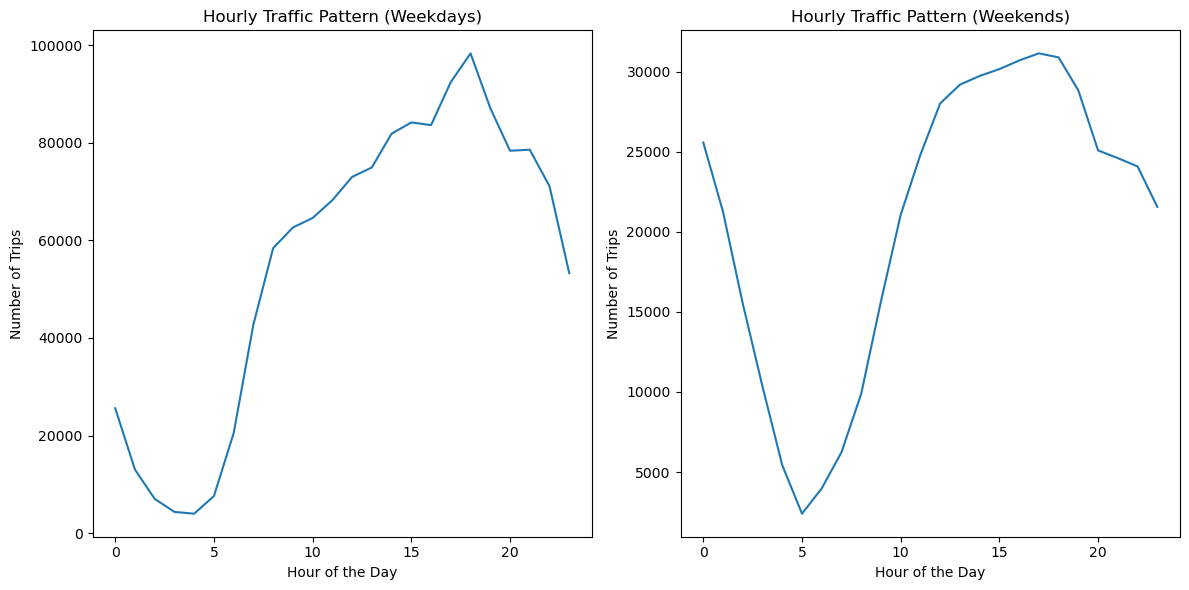

In [195]:
# Compare traffic trends for the week days and weekends
# Assuming 'df' is your DataFrame and it has columns 'DayOfWeek' and 'Hour'
# and 'tpep_pickup_datetime' has been converted to datetime objects

# Group data by day of week and hour to calculate hourly traffic patterns
weekday_traffic = df[df['DayOfWeek'] < 5].groupby('Hour')['Hour'].count()
weekend_traffic = df[df['DayOfWeek'] >= 5].groupby('Hour')['Hour'].count()

# Create subplots for visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(weekday_traffic.index, weekday_traffic.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Traffic Pattern (Weekdays)')

plt.subplot(1, 2, 2)
plt.plot(weekend_traffic.index, weekend_traffic.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Traffic Pattern (Weekends)')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top 10 Pickup Zones:
 PULocationID
132    96827
237    86905
161    85948
236    77517
162    65634
138    64177
186    63471
230    61315
142    60887
170    54493
Name: count, dtype: int64

Top 10 Dropoff Zones:
 DOLocationID
236    81269
237    77559
161    71648
230    56404
170    54316
162    52250
142    51494
239    51260
141    48449
68     46355
Name: count, dtype: int64


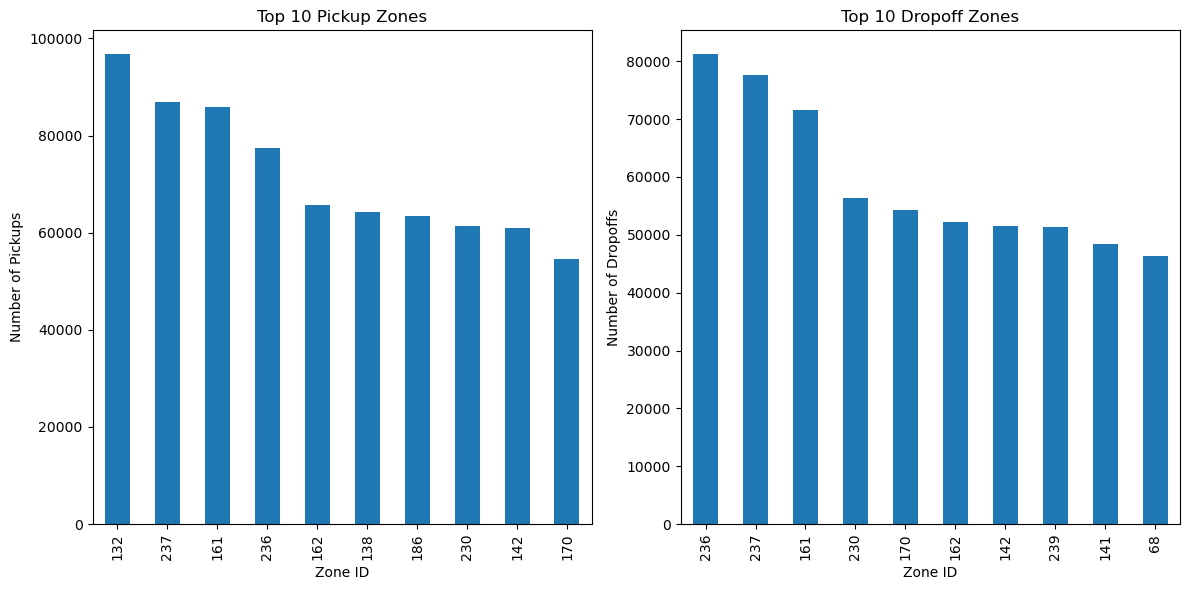

In [196]:
# Find top 10 pickup and dropoff zones
# Assuming 'df' is your DataFrame and it has columns 'PULocationID' and 'DOLocationID'

# Top 10 pickup locations
top_10_pickup_zones = df['PULocationID'].value_counts().nlargest(10)
print("Top 10 Pickup Zones:\n", top_10_pickup_zones)

# Top 10 dropoff locations
top_10_dropoff_zones = df['DOLocationID'].value_counts().nlargest(10)
print("\nTop 10 Dropoff Zones:\n", top_10_dropoff_zones)

# You can visualize these trends using bar plots or other suitable visualizations.
# Example using bar plots:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_10_pickup_zones.plot(kind='bar')
plt.title('Top 10 Pickup Zones')
plt.xlabel('Zone ID')
plt.ylabel('Number of Pickups')

plt.subplot(1, 2, 2)
top_10_dropoff_zones.plot(kind='bar')
plt.title('Top 10 Dropoff Zones')
plt.xlabel('Zone ID')
plt.ylabel('Number of Dropoffs')

plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [197]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate pickup and dropoff counts for each zone
pickup_counts = df['PULocationID'].value_counts()
dropoff_counts = df['DOLocationID'].value_counts()

# Calculate the ratio of pickups to dropoffs for each zone
pickup_dropoff_ratio = pickup_counts / dropoff_counts

# Display the 10 highest and 10 lowest ratios
print("Top 10 Pickup/Dropoff Ratios:")
print(pickup_dropoff_ratio.nlargest(10))

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(pickup_dropoff_ratio.nsmallest(10))

Top 10 Pickup/Dropoff Ratios:
70     8.320717
132    4.617406
138    2.884489
186    1.582147
43     1.374760
114    1.374743
249    1.326178
162    1.256153
161    1.199587
100    1.191833
Name: count, dtype: float64

Bottom 10 Pickup/Dropoff Ratios:
27     0.025641
221    0.029412
257    0.038259
1      0.040233
115    0.043478
198    0.052525
128    0.055556
112    0.056727
37     0.059603
252    0.061972
Name: count, dtype: float64


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [198]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Filter data for night hours (11 PM to 5 AM)
night_hours_df = df[(df['Hour'] >= 23) | (df['Hour'] <= 5)]

# Top 10 pickup zones during night hours
top_10_night_pickup = night_hours_df['PULocationID'].value_counts().nlargest(10)
print("Top 10 Pickup Zones (Night Hours):\n", top_10_night_pickup)

# Top 10 dropoff zones during night hours
top_10_night_dropoff = night_hours_df['DOLocationID'].value_counts().nlargest(10)
print("\nTop 10 Dropoff Zones (Night Hours):\n", top_10_night_dropoff)

Top 10 Pickup Zones (Night Hours):
 PULocationID
79     15552
132    14545
249    12472
48     10463
148     9629
114     8749
230     8206
186     6968
164     6143
68      6050
Name: count, dtype: int64

Top 10 Dropoff Zones (Night Hours):
 DOLocationID
79     8314
48     6874
170    6266
68     5860
107    5757
141    5272
263    4978
249    4944
230    4643
148    4382
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [199]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = df[(df['Hour'] >= 23) | (df['Hour'] <= 5)]


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

passenger_count
0.0    inf
1.0    inf
2.0    inf
3.0    inf
4.0    inf
5.0    inf
6.0    inf
Name: fare_per_mile_per_passenger, dtype: float64


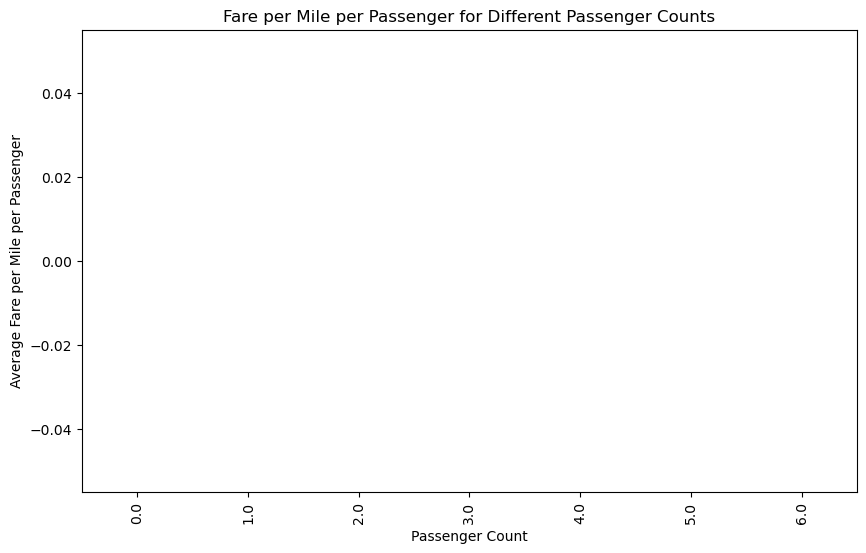

In [200]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate fare per mile per passenger
df['fare_per_mile_per_passenger'] = df['fare_amount'] / (df['trip_distance'] * df['passenger_count'])

# Group by passenger count and calculate the average fare per mile per passenger
fare_analysis = df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

# Print or visualize the results
print(fare_analysis)

# You can create a bar plot to visualize the fare per mile per passenger for different passenger counts
plt.figure(figsize=(10, 6))
fare_analysis.plot(kind='bar')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger')
plt.title('Fare per Mile per Passenger for Different Passenger Counts')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

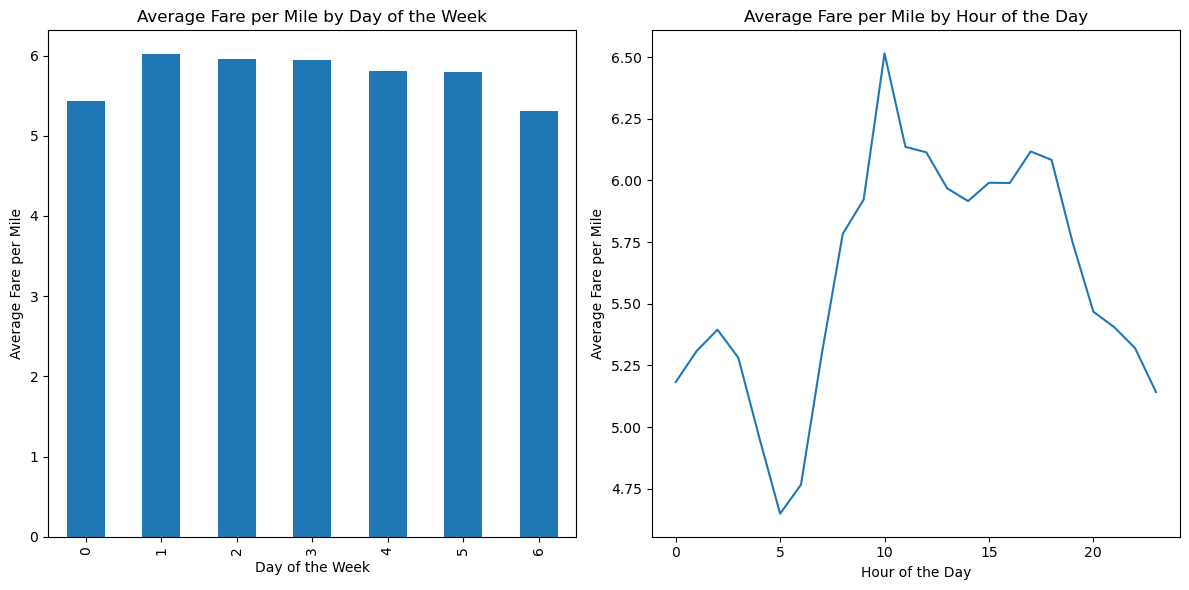

In [201]:
# Compare the average fare per mile for different days and for different times of the day
# Calculate average fare per mile for different days of the week
fare_per_mile_by_day = df.groupby('DayOfWeek')['fare_amount'].mean() / df.groupby('DayOfWeek')['trip_distance'].mean()

# Calculate average fare per mile for different hours of the day
fare_per_mile_by_hour = df.groupby('Hour')['fare_amount'].mean() / df.groupby('Hour')['trip_distance'].mean()

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
fare_per_mile_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile by Day of the Week')

plt.subplot(1, 2, 2)
fare_per_mile_by_hour.plot()
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile by Hour of the Day')


plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

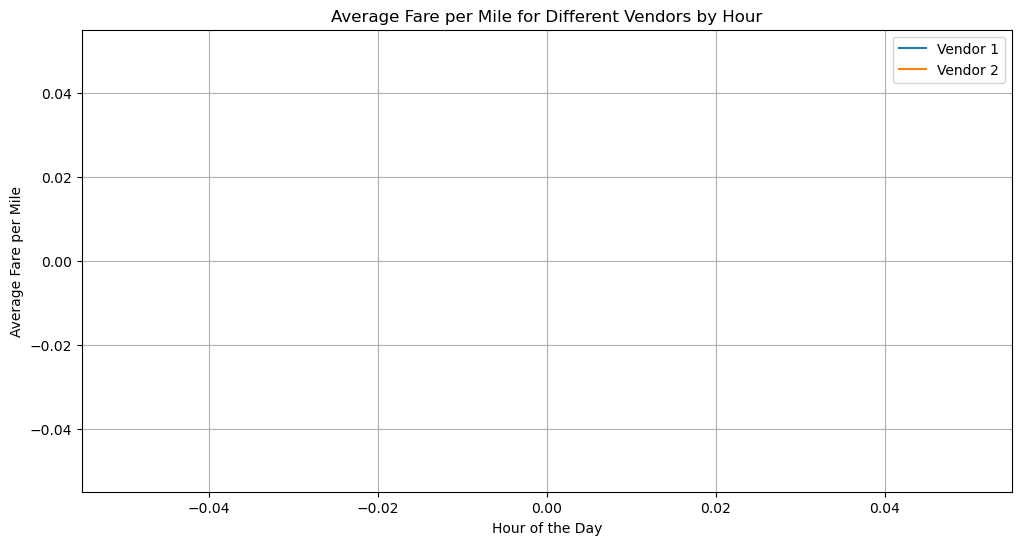

In [202]:
# Compare fare per mile for different vendors

# Calculate fare per mile for each trip
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

# Group data by VendorID and Hour to calculate the average fare per mile
fare_per_mile_by_vendor_hour = df.groupby(['VendorID', 'Hour'])['fare_per_mile'].mean().reset_index()

# Pivot the table for easier visualization
fare_per_mile_pivot = fare_per_mile_by_vendor_hour.pivot(index='Hour', columns='VendorID', values='fare_per_mile')

# Plotting the results
plt.figure(figsize=(12, 6))
for vendor in fare_per_mile_pivot.columns:
    plt.plot(fare_per_mile_pivot.index, fare_per_mile_pivot[vendor], label=f'Vendor {vendor}')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile for Different Vendors by Hour')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


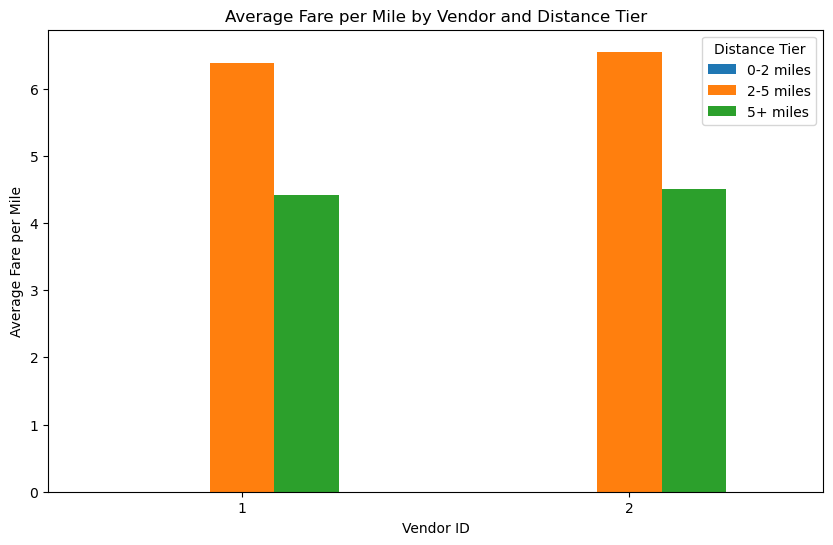

In [203]:
# Define distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return '0-2 miles'
    elif 2 < distance <= 5:
        return '2-5 miles'
    else:
        return '5+ miles'

df['distance_tier'] = df['trip_distance'].apply(categorize_distance)

# Group data by vendor and distance tier to calculate average fare per mile
fare_by_vendor_distance = df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

# Plotting the results
fare_by_vendor_distance.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xticks(rotation=0)
plt.legend(title='Distance Tier')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

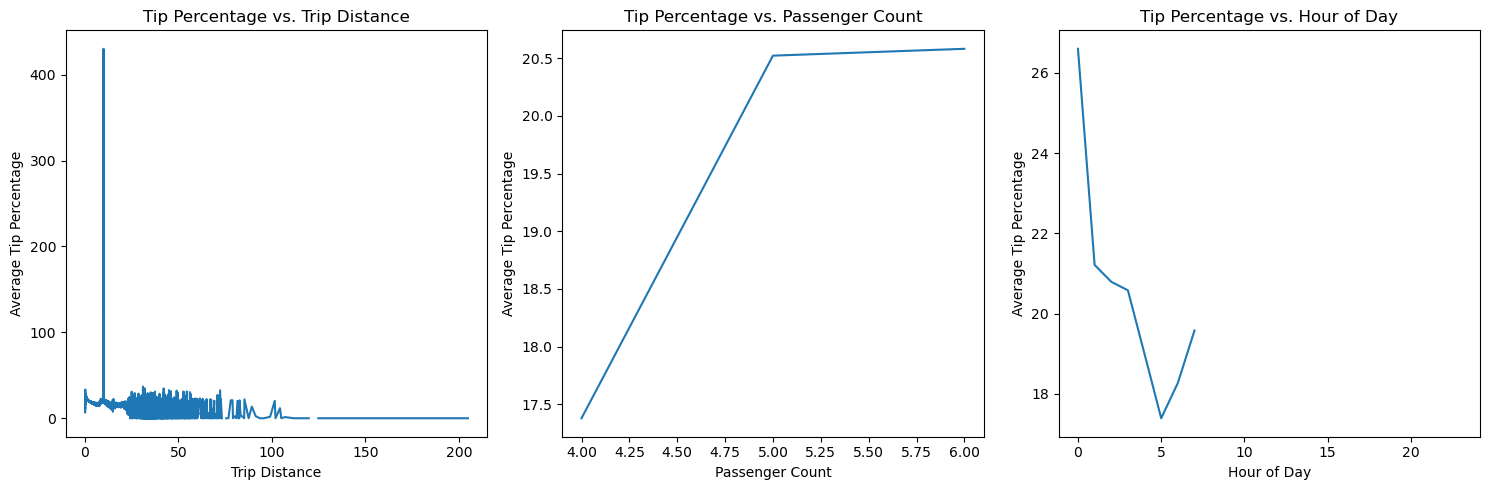

In [204]:
# Calculate tip percentage
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100

# Group data and calculate average tip percentage
tip_by_distance = df.groupby('trip_distance')['tip_percentage'].mean()
tip_by_passenger_count = df.groupby('passenger_count')['tip_percentage'].mean()
tip_by_hour = df.groupby('Hour')['tip_percentage'].mean()

# Plotting the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(tip_by_distance.index, tip_by_distance.values)
plt.xlabel('Trip Distance')
plt.ylabel('Average Tip Percentage')
plt.title('Tip Percentage vs. Trip Distance')

plt.subplot(1, 3, 2)
plt.plot(tip_by_passenger_count.index, tip_by_passenger_count.values)
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.title('Tip Percentage vs. Passenger Count')

plt.subplot(1, 3, 3)
plt.plot(tip_by_hour.index, tip_by_hour.values)
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage')
plt.title('Tip Percentage vs. Hour of Day')

plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [205]:
# Filter for low tip percentage trips
low_tip_trips = df[df['tip_percentage'] < 10]

# Filter for high tip percentage trips
high_tip_trips = df[df['tip_percentage'] > 25]

# Compare different attributes (example: trip distance)
print("Low Tip Trips - Trip Distance Stats:\n", low_tip_trips['trip_distance'].describe())
print("\nHigh Tip Trips - Trip Distance Stats:\n", high_tip_trips['trip_distance'].describe())

# Compare other attributes (example: passenger count)
print("\nLow Tip Trips - Passenger Count Stats:\n", low_tip_trips['passenger_count'].describe())
print("\nHigh Tip Trips - Passenger Count Stats:\n", high_tip_trips['passenger_count'].describe())

# Compare other attributes (example: hour of the day)
print("\nLow Tip Trips - Hour Stats:\n", low_tip_trips['Hour'].describe())
print("\nHigh Tip Trips - Hour Stats:\n", high_tip_trips['Hour'].describe())

# You can perform more detailed comparisons using visualizations or statistical tests as needed


Low Tip Trips - Trip Distance Stats:
 count    486462.000000
mean          3.797260
std           5.166307
min           0.000000
25%           1.000000
50%           1.810000
75%           3.900000
max         204.860000
Name: trip_distance, dtype: float64

High Tip Trips - Trip Distance Stats:
 count    817211.000000
mean          2.290561
std           2.901904
min           0.000000
25%           0.920000
50%           1.420000
75%           2.220000
max          72.280000
Name: trip_distance, dtype: float64

Low Tip Trips - Passenger Count Stats:
 count    486462.000000
mean          1.407094
std           0.926391
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

High Tip Trips - Passenger Count Stats:
 count    817211.000000
mean          1.347787
std           0.876523
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [206]:
# See how passenger count varies across hours and days

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831515 entries, 0 to 1831514
Data columns (total 36 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   VendorID                     int64         
 1   tpep_pickup_datetime         datetime64[ns]
 2   tpep_dropoff_datetime        datetime64[ns]
 3   passenger_count              float64       
 4   trip_distance                float64       
 5   RatecodeID                   float64       
 6   store_and_fwd_flag           object        
 7   PULocationID                 int64         
 8   DOLocationID                 int64         
 9   payment_type                 int64         
 10  fare_amount                  float64       
 11  extra                        float64       
 12  mta_tax                      float64       
 13  tip_amount                   float64       
 14  tolls_amount                 float64       
 15  improvement_surcharge        float64       
 16  

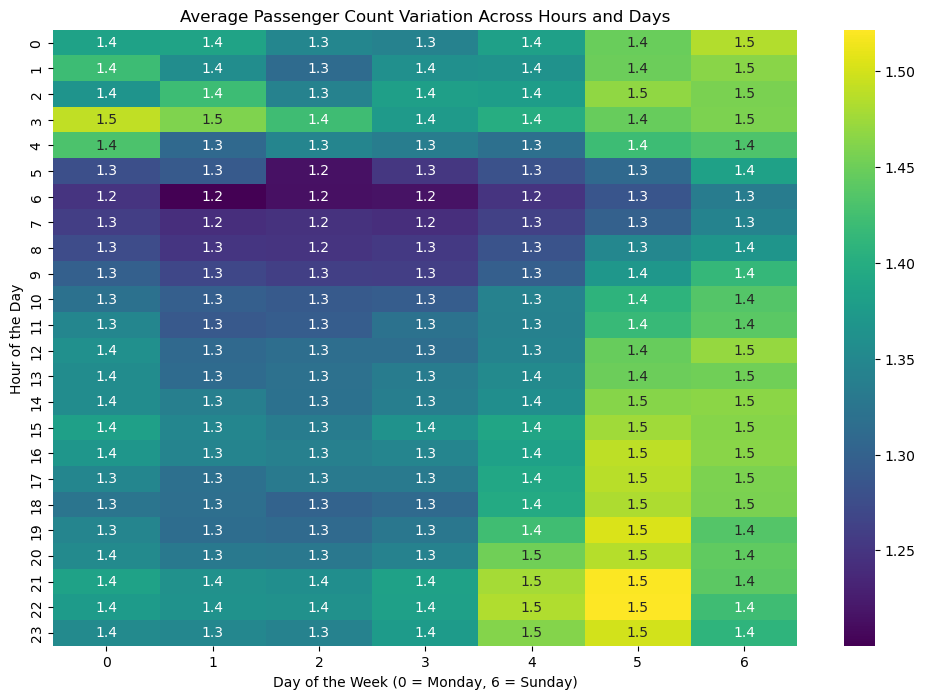

In [207]:
# Group data by hour and day of the week, then calculate the average passenger count
passenger_count_variation = df.groupby(['Hour', 'DayOfWeek'])['passenger_count'].mean().reset_index()

# Create a heatmap to visualize the variation
plt.figure(figsize=(12, 8))
heatmap_data = passenger_count_variation.pivot(index='Hour', columns='DayOfWeek', values='passenger_count')
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='viridis')
plt.title('Average Passenger Count Variation Across Hours and Days')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Hour of the Day')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

PULocationID
1      1.579439
2      1.000000
3      1.025000
4      1.409457
5      1.000000
         ...   
261    1.531848
262    1.313588
263    1.321250
264    1.331394
265    1.473420
Name: passenger_count, Length: 257, dtype: float64


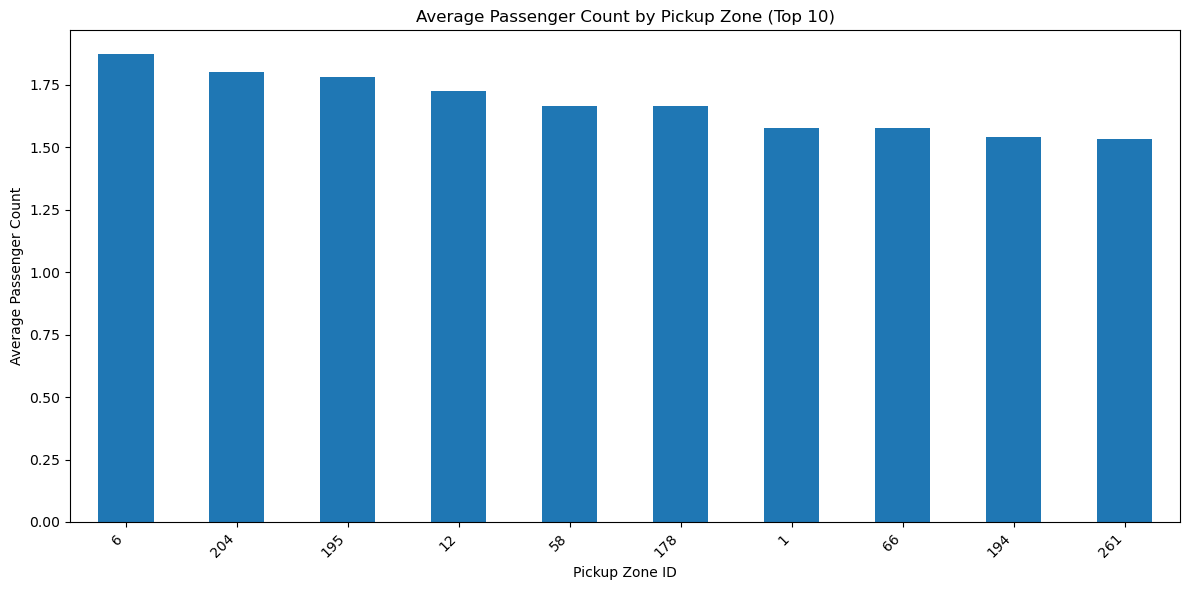

In [208]:
# How does passenger count vary across zones

import matplotlib.pyplot as plt
# Analyze passenger count variation across zones
passenger_count_by_zone = df.groupby('PULocationID')['passenger_count'].mean()

# Display the result
print(passenger_count_by_zone)

# You can also visualize this using a bar plot or merge it with the zones shapefile for a spatial visualization.
# Example using a bar plot for the top zones
plt.figure(figsize=(12, 6))
passenger_count_by_zone.nlargest(10).plot(kind='bar') # Displaying top 10 zones for readability
plt.xlabel('Pickup Zone ID')
plt.ylabel('Average Passenger Count')
plt.title('Average Passenger Count by Pickup Zone (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# To visualize on the map, you would merge this with the zones GeoDataFrame
# zones_with_avg_passenger = zones.merge(passenger_count_by_zone.rename('avg_passenger_count'), left_on='LocationID', right_index=True)
# fig, ax = plt.subplots(1, 1, figsize=(12, 10))
# zones_with_avg_passenger.plot(column='avg_passenger_count', ax=ax, legend=True, legend_kwds={'label': "Average Passenger Count", 'orientation': "vertical"})
# plt.show()

Columns in zones_with_trips: ['OBJECTID_x', 'Shape_Leng_x', 'Shape_Area_x', 'zone_x', 'LocationID_x', 'borough_x', 'geometry_x', 'trip_count', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'Date', 'Hour', 'DayOfWeek', 'Month', 'Quarter', 'trip_duration', 'OBJECTID_y', 'Shape_Leng_y', 'Shape_Area_y', 'zone_y', 'LocationID_y', 'borough_y', 'geometry_y', 'fare_per_mile_per_passenger', 'fare_per_mile', 'distance_tier', 'tip_percentage']
   LocationID                     zone  average_passenger_count
0           1           Newark Airport                 1.579439
1           2              Jamaica Bay                 1.000000
2           3  Allerton/Pelham Gardens                 1.025000
3           4            Al

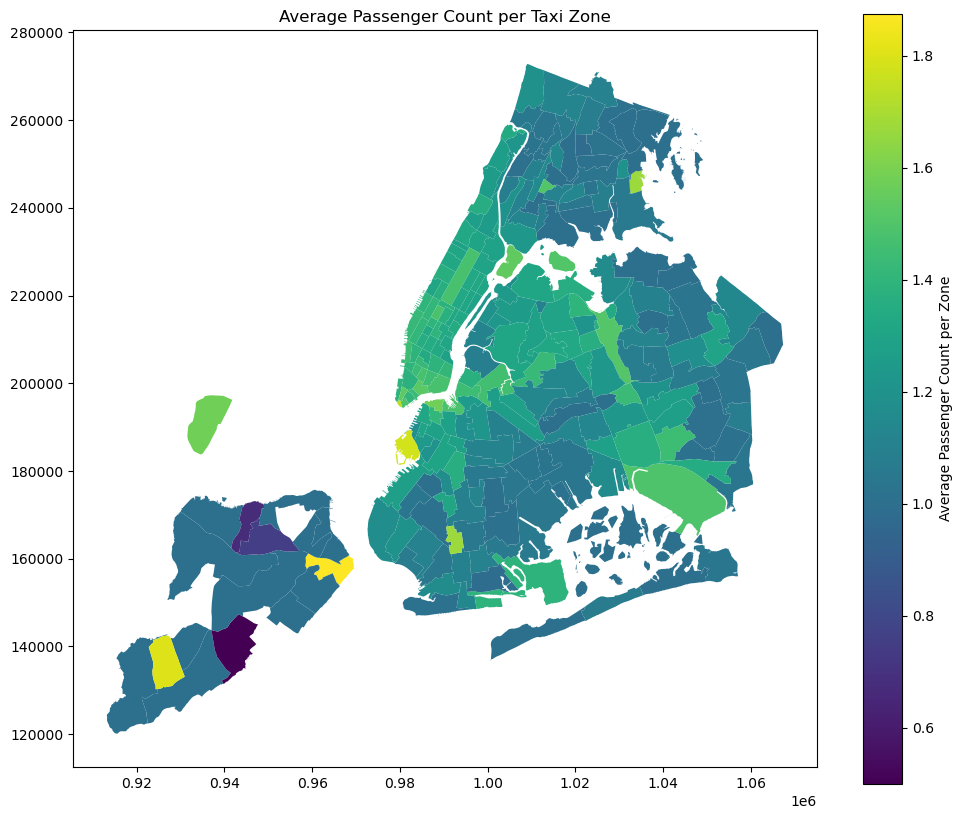

In [209]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# # Create a new column for the average passenger count in each zone.

import matplotlib.pyplot as plt
# Assuming zones_with_trips is your GeoDataFrame
# You would create it by merging the zones GeoDataFrame with relevant trip data
# For this task, let's assume you have a GeoDataFrame named `zones_with_trips`
# which contains the geometry of the zones and is merged with the original trip DataFrame 'df'

# If you don't have zones_with_trips yet, you can create it like this:
# Merge zones GeoDataFrame with the original trip DataFrame 'df' on LocationID and PULocationID
# Using a left merge to keep all zones from the zones GeoDataFrame
zones_with_trips = zones.merge(df, left_on='LocationID', right_on='PULocationID', how='left')

# Print columns to verify
print("Columns in zones_with_trips:", zones_with_trips.columns.tolist())

# Calculate the average passenger count for each zone (PULocationID)
average_passenger_count_by_zone = zones_with_trips.groupby('PULocationID')['passenger_count'].mean()

# Merge this average passenger count back to the zones GeoDataFrame
# This adds a new column 'average_passenger_count' to the zones GeoDataFrame
zones = zones.merge(average_passenger_count_by_zone.rename('average_passenger_count'), left_on='LocationID', right_index=True, how='left')

# Display the zones GeoDataFrame with the new column
print(zones[['LocationID', 'zone', 'average_passenger_count']].head())

# Now, you can use the `zones` GeoDataFrame (which now has 'average_passenger_count')
# to plot the average passenger count per zone on a map if needed.
# Example plotting the average passenger count:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(column='average_passenger_count', ax=ax, legend=True, legend_kwds={'label': "Average Passenger Count per Zone", 'orientation': "vertical"})
plt.title("Average Passenger Count per Taxi Zone")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of each surcharge application:
extra: 1134435 times
mta_tax: 1814485 times
improvement_surcharge: 1830850 times
congestion_surcharge: 1690632 times
Airport_fee: 0 times


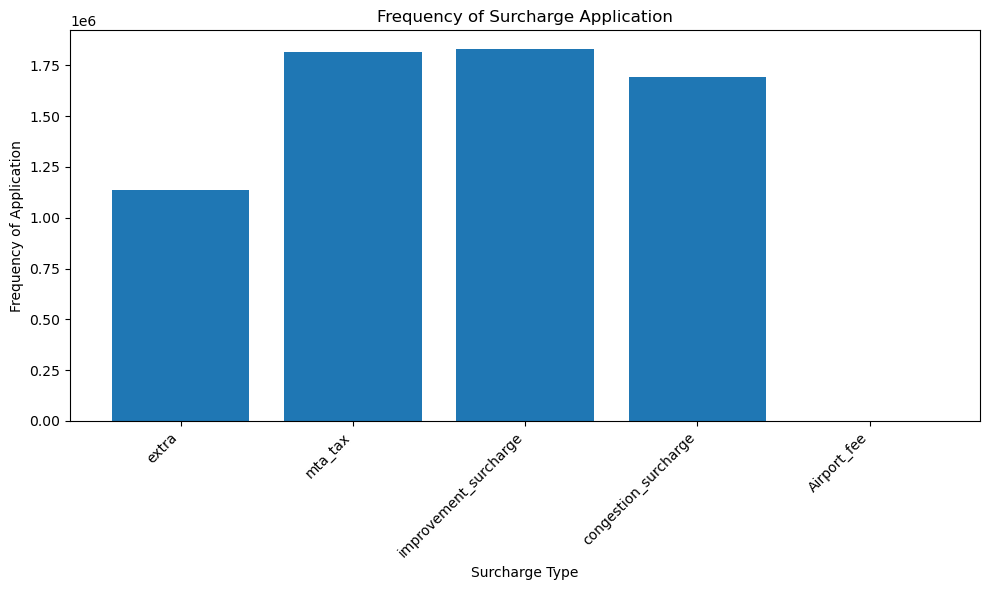

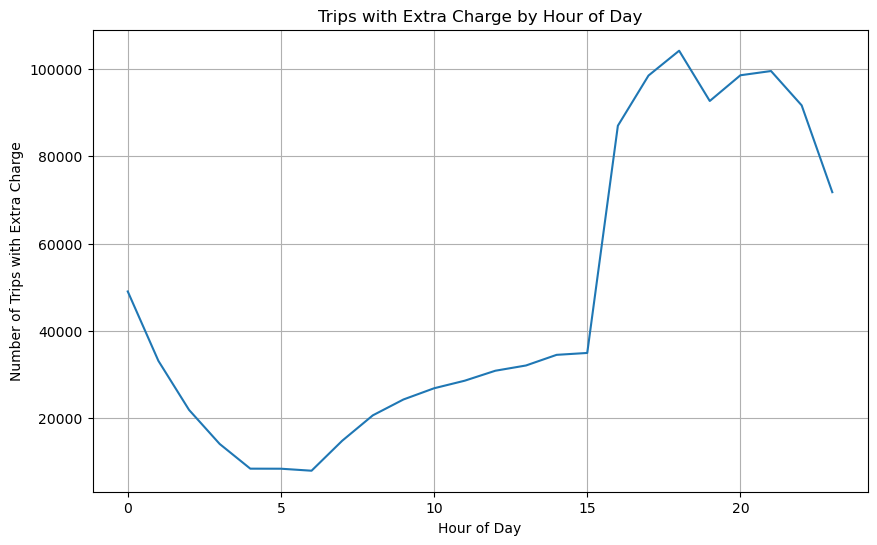

In [210]:
# How often is each surcharge applied?

import matplotlib.pyplot as plt
# Columns representing surcharges and extra charges
surcharge_columns = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']

# Calculate the frequency (number of times) each surcharge is applied
surcharge_counts = {}
for col in surcharge_columns:
    # Count trips where the surcharge amount is greater than 0
    if col in df.columns:
      surcharge_counts[col] = (df[col] > 0).sum()
    else:
      surcharge_counts[col] = 0 # Or handle missing columns as appropriate

print("Frequency of each surcharge application:")
for surcharge, count in surcharge_counts.items():
    print(f"{surcharge}: {count} times")

# You can also visualize this
plt.figure(figsize=(10, 6))
plt.bar(surcharge_counts.keys(), surcharge_counts.values())
plt.xlabel("Surcharge Type")
plt.ylabel("Frequency of Application")
plt.title("Frequency of Surcharge Application")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Analyze when/where extra charges are applied more frequently
# For example, by hour of day for 'extra' (rush hour/overnight charge)
if 'extra' in df.columns:
  extra_by_hour = df[df['extra'] > 0].groupby('Hour')['extra'].count()
  plt.figure(figsize=(10, 6))
  plt.plot(extra_by_hour.index, extra_by_hour.values)
  plt.xlabel("Hour of Day")
  plt.ylabel("Number of Trips with Extra Charge")
  plt.title("Trips with Extra Charge by Hour of Day")
  plt.grid(True)
  plt.show()

# For example, by pickup borough for 'congestion_surcharge' (if PU_borough is available)
if 'congestion_surcharge' in df.columns and 'PU_borough' in df.columns:
    congestion_by_borough = df[df['congestion_surcharge'] > 0].groupby('PU_borough')['congestion_surcharge'].count()
    plt.figure(figsize=(10, 6))
    congestion_by_borough.plot(kind='bar')
    plt.xlabel("Pickup Borough")
    plt.ylabel("Number of Trips with Congestion Surcharge")
    plt.title("Trips with Congestion Surcharge by Pickup Borough")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# You can perform similar analysis for other surcharges and dimensions (e.g., day of week, specific zones)

In [211]:
# Calculate the frequency of each surcharge
extra_charges_freq = df['extra'].value_counts(normalize=True) * 100  # Percentage
mta_tax_freq = df['mta_tax'].value_counts(normalize=True) * 100
tolls_amount_freq = df['tolls_amount'].value_counts(normalize=True) * 100

print("Extra Charges Frequency:\n", extra_charges_freq)
print("\nMTA Tax Frequency:\n", mta_tax_freq)
print("\nTolls Amount Frequency:\n", tolls_amount_freq)

# To analyze pickup/dropoff zones or times when extra charges are applied more frequently:

# Group by pickup zone and calculate the frequency of extra charges
extra_charges_by_pickup_zone = df.groupby('PULocationID')['extra'].value_counts(normalize=True).unstack()

# Similarly for dropoff zone:
extra_charges_by_dropoff_zone = df.groupby('DOLocationID')['extra'].value_counts(normalize=True).unstack()

# Group by hour of the day:
extra_charges_by_hour = df.groupby('Hour')['extra'].value_counts(normalize=True).unstack()

# Display or visualize the results (e.g., using bar plots or heatmaps)
print("\nExtra Charges by Pickup Zone:\n", extra_charges_by_pickup_zone)
print("\nExtra Charges by Dropoff Zone:\n", extra_charges_by_dropoff_zone)
print("\nExtra Charges by Hour:\n", extra_charges_by_hour)


Extra Charges Frequency:
 extra
0.00     38.060294
2.50     25.352727
1.00     19.741744
5.00      7.327759
3.50      5.860722
7.50      0.887462
6.00      0.846949
4.25      0.348345
9.25      0.344633
1.75      0.176357
3.75      0.142833
6.75      0.123777
2.75      0.120447
8.75      0.115806
10.25     0.092383
1.25      0.076439
7.75      0.076166
11.75     0.072727
2.25      0.048484
6.25      0.043407
10.00     0.030958
9.75      0.029975
7.25      0.025498
11.25     0.022440
8.50      0.020147
3.20      0.002348
3.00      0.002129
5.25      0.001201
0.50      0.001147
4.75      0.000655
0.75      0.000601
3.25      0.000437
1.50      0.000437
4.50      0.000382
2.45      0.000328
2.72      0.000273
2.00      0.000218
12.50     0.000164
14.25     0.000164
6.80      0.000109
3.05      0.000109
0.70      0.000109
0.25      0.000109
7.00      0.000109
0.03      0.000055
13.75     0.000055
2.20      0.000055
8.20      0.000055
1.05      0.000055
11.00     0.000055
5.30      0.000055

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

## 🚕 Recommendations to Optimize Routing and Dispatching

### 1. **Align Dispatch with Hourly Demand Patterns**
- Analyze pickup trends across different hours of the day.
- **Peak Hours Identified:** Morning (7–10 AM) and Evening (5–8 PM).
- **Recommendation:** Increase taxi availability in high-demand hours using predictive scheduling algorithms.

### 2. **Zone-Based Taxi Allocation**
- Identify high-frequency pickup/drop-off zones (e.g., airports, Midtown Manhattan).
- **Recommendation:** Prioritize positioning of idle taxis in high-demand zones using historical location data.

### 3. **Avoid Unproductive Trips**
- Flag and reduce trips with:
  - `trip_distance = 0` and `fare_amount > 300`
  - Different pickup/drop-off zones but `distance = 0`
- **Recommendation:** Implement automatic validation to prevent erroneous route assignments or fare calculations.

### 4. **Passenger Count-Based Optimization**
- Majority of trips involve 1–2 passengers.
- Trips with 7+ passengers are rare and often outliers.
- **Recommendation:** Match vehicle types to typical passenger count to reduce fuel and maintenance costs.

### 5. **Dynamic Fare Zone Strategy**
- Use data on high-toll and high-fare zones to optimize routing.
- **Recommendation:** Leverage historical tolls and surcharges to re-route taxis around expensive or congested zones when feasible.

### 6. **Optimize for Payment Preferences**
- Credit card payments dominate the transactions.
- **Recommendation:** Equip all taxis with fast, reliable digital payment options and reward digital payments to reduce cash handling errors.

### 7. **Handle Airport Traffic Strategically**
- Airports incur additional fees and congestion surcharges.
- **Recommendation:** Deploy more taxis at airports during high flight arrival periods and optimize back-haul strategies to avoid deadhead miles.

### 8. **Outlier Filtering and Data Cleaning Pipeline**
- Regular detection of extreme outliers in fare, distance, and time.
- **Recommendation:** Deploy real-time anomaly detection models to correct or flag suspicious entries during dispatch.

### 9. **Minimize Idle Time**
- Use hourly and location-wise trip density to direct idle taxis to nearby hotspots.
- **Recommendation:** Build a heatmap-based live dispatch assistant to reduce idle time and fuel waste.

### 10. **Predictive Maintenance and Routing**
- Analyze unusually high `trip_distance` or `fare_amount` for potential fraudulent or inefficient routes.
- **Recommendation:** Integrate routing systems with GPS validation and predictive maintenance alerts based on usage anomalies.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

## 📍 Suggestions for Strategic Cab Positioning Across Zones

### 1. **Deploy Cabs Based on Hourly Demand Peaks**
- **Observation:** Peak demand observed during morning (7–10 AM) and evening (5–8 PM) hours.
- **Suggestion:** 
  - Position more cabs in residential zones during early morning hours to capture outbound commuters.
  - Shift taxis to business/commercial zones in the evening for return trips.

### 2. **Zone-Wise Allocation Using Weekday vs Weekend Patterns**
- **Observation:** 
  - Weekday trips are higher in commercial districts.
  - Weekend demand increases around entertainment and leisure zones (e.g., parks, malls, airports).
- **Suggestion:** 
  - Increase weekday cab presence in downtown/financial districts.
  - Redirect more cabs to tourist zones and outer boroughs during weekends.

### 3. **Monthly/Seasonal Trends**
- **Observation:** Demand varies by month (e.g., December sees airport trip surges due to holidays).
- **Suggestion:** 
  - Use historical monthly demand to pre-position taxis in high-travel zones like JFK, LaGuardia during holidays or peak tourist seasons.
  - Add temporary cab hotspots during city events, festivals, or weather anomalies.

### 4. **Airport and Transit Hub Readiness**
- **Observation:** Airport pickups carry additional fees and high congestion surcharges.
- **Suggestion:** 
  - Maintain a rotating pool of taxis stationed at airports and major train/bus stations.
  - Implement dynamic cab queues based on flight/train arrival data.

### 5. **Use Heatmaps for Micro-Zone Clustering**
- **Observation:** Demand density varies even within the same borough.
- **Suggestion:** 
  - Create sub-zonal clusters (e.g., Midtown East vs Midtown West) using trip frequency heatmaps.
  - Distribute taxis within micro-clusters to avoid overcrowding in a few hotspots.

### 6. **Night-time Positioning and Safety Zones**
- **Observation:** Fewer trips occur during night hours, but certain areas still show consistent demand.
- **Suggestion:** 
  - Maintain night patrol cabs in hospital zones, transportation hubs, and nightlife districts.
  - Offer incentives for drivers to operate in these regions during off-peak hours.

### 7. **Leverage Drop-off Patterns for Repositioning**
- **Observation:** Cabs often return empty after drop-offs in peripheral zones.
- **Suggestion:** 
  - Analyze drop-off trends to find nearby zones with rising pickup demand.
  - Use real-time systems to suggest repositioning locations before next trip demand peaks.

### 8. **Dynamic Rebalancing Based on Live Trends**
- **Suggestion:** 
  - Use real-time analytics dashboards to monitor trip requests.
  - Move idle cabs from low-demand zones to surging areas dynamically using a dispatch optimization algorithm.

---

By applying these zone-wise, time-aware positioning strategies, taxi operations can significantly reduce idle times, improve customer wait times, and optimize revenue per trip.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

## 💰 Data-Driven Adjustments to Pricing Strategy

### 1. **Implement Dynamic Pricing Based on Demand Peaks**
- **Observation:** Trip volumes increase during peak hours (morning and evening rush) and weekends.
- **Recommendation:**
  - Introduce *surge pricing* during high-demand hours, especially in congested or high-traffic zones.
  - Offer lower base fares in off-peak hours to attract more passengers and keep drivers engaged.

### 2. **Zone-Based Fare Differentiation**
- **Observation:** Certain zones like airports, financial districts, and entertainment areas exhibit higher trip densities and fare tolerance.
- **Recommendation:**
  - Introduce micro-zonal pricing: slightly higher base fares or distance rates in premium zones (e.g., airports, Midtown Manhattan).
  - Offer discounts or flat rates in low-demand zones to stimulate ride requests.

### 3. **Distance and Duration-Based Optimization**
- **Observation:** Trips with short distances often have lower profitability unless optimized.
- **Recommendation:**
  - Apply minimum fare thresholds to ensure profitability on short trips.
  - For longer trips, consider offering capped fares beyond a certain distance to remain competitive.

### 4. **Penalty Pricing for Inefficiencies**
- **Observation:** Some rides show fare anomalies (e.g., high fare for near-zero distance).
- **Recommendation:**
  - Add logic to flag and correct these issues.
  - Penalize misuse/fraudulent reporting through internal controls.

### 5. **Incentivize Digital Payments**
- **Observation:** Credit card payments are the most common; cash/no-charge/disputes can lead to revenue leakage.
- **Recommendation:**
  - Offer small discounts or reward points for digital payments.
  - Introduce loyalty benefits for frequent digital payers to increase retention.

### 6. **Offer Subscription-Based Pricing for Regular Riders**
- **Recommendation:**
  - Introduce monthly/weekly ride passes or corporate subscription plans with discounted per-trip fares.
  - Target commuters and regular zone-to-zone travelers for stable revenue generation.

### 7. **Incorporate Real-Time Cost Factors**
- **Observation:** Fares do not currently adjust for real-time traffic or congestion levels.
- **Recommendation:**
  - Integrate real-time traffic APIs and include congestion multipliers in pricing (similar to rideshare platforms).
  - Adjust pricing based on toll charges, time-of-day congestion, or weather conditions.

### 8. **Competitor Benchmarking**
- **Recommendation:**
  - Monitor pricing trends from other ride-hailing platforms (Uber, Lyft, etc.) using web-scraped or API-based data.
  - Ensure base fare + surcharge structures stay competitive while offering better availability or reliability.

---

By aligning pricing strategies with spatial-temporal demand patterns, customer preferences, and competitive benchmarking, the company can sustainably maximize revenue and improve customer satisfaction.
